# 1 - Introduction

This notebook focus on the variables in the Beverages and investigate whether those variables have similar characteristics or features, using other variables in the data. The variables include Calories, Fat(g), Carb(g), Fibre(g), Protein and Sodium.

In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import inv
from scipy import  stats
import pylab as pl
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
import math
from scipy.stats import lognorm
import plotly
#%matplotlib widget
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from kmodes.kmodes import KModes
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score
from sklearn.model_selection import GridSearchCV
#from sklearn.externals import joblib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
import statsmodels.api as sm
import math
import warnings
warnings.filterwarnings('ignore')

In [163]:
#from google.colab import drive
#drive.mount ('/content/drive')
#%cd '/content/drive/My Drive/Colab'

In [165]:
starbucks = pd.read_csv(r'C:\Users\HP\Downloads\starbucks-menu-nutrition-drinks.csv')

In [70]:
# Laod the data and view the first 10 rows
starbucks.head(10)

Beverages  Calories  Fat(g)  \
0           Cool Lime Starbucks Refreshers™ Beverage      45.0     0.0   
1                                   Ombré Pink Drink       NaN     NaN   
2                                         Pink Drink       NaN     NaN   
3     Strawberry Acai Starbucks Refreshers™ Beverage      80.0     0.0   
4  Very Berry Hibiscus Starbucks Refreshers™ Beve...      60.0     0.0   
5                                       Violet Drink       NaN     NaN   
6  Evolution Fresh™ ColdNaNPressed Apple Berry Juice       NaN     NaN   
7                        Evolution Fresh™ Defense Up       NaN     NaN   
8            Evolution Fresh™ Organic Ginger Limeade     110.0     0.0   
9                                        Iced Coffee       0.0     0.0   

   Carb(g)  Fiber(g)  Protein  Sodium  
0     11.0       0.0      0.0    10.0  
1      NaN       NaN      NaN     NaN  
2      NaN       NaN      NaN     NaN  
3     18.0       1.0      0.0    10.0  
4     14.0       1.0      0.0    10.0  
5      NaN       NaN      NaN     NaN  
6      NaN       NaN      NaN     NaN  
7      NaN       NaN      NaN     NaN  
8     28.0       0.0      0.0     5.0  
9      0.0       0.0      0.0     0.0

In [71]:
# Get the idea of the size of the dataset
starbucks.shape

(177, 7)

In [72]:
starbucks['Beverages'].unique()

array(['Cool Lime Starbucks Refreshers™ Beverage', 'Ombré Pink Drink',
       'Pink Drink', 'Strawberry Acai Starbucks Refreshers™ Beverage',
       'Very Berry Hibiscus Starbucks Refreshers™ Beverage',
       'Violet Drink',
       'Evolution Fresh™ ColdNaNPressed Apple Berry Juice',
       'Evolution Fresh™ Defense Up',
       'Evolution Fresh™ Organic Ginger Limeade', 'Iced Coffee',
       'Iced Coffee with Milk',
       'Iced Espresso Classics NaN Vanilla Latte',
       'Iced Espresso Classics NaN Caffe Mocha',
       'Iced Espresso Classics NaN Caramel Macchiato',
       'Starbucks® Caramel Iced Coffee', 'Starbucks® Iced Coffee + Milk',
       'Starbucks® Low Calorie Iced Coffee + Milk',
       'Starbucks® Vanilla Iced Coffee', 'Shaken Sweet Tea',
       'Tazo® Bottled Berry Blossom White', 'Tazo® Bottled Black Mango',
       'Tazo® Bottled Black with Lemon', 'Tazo® Bottled Brambleberry',
       'Tazo® Bottled Giant Peach', 'Tazo® Bottled Iced Passion',
       'Tazo® Bottled Lemon

There exist 177 rows and 7 columns. From the dataset, few rows are not significant (NA) and will not add any insight to the analysis so they will be dropped to enable us to have a clean dataset

In [73]:
starbucks.describe()

Calories     Fat(g)    Carb(g)   Fiber(g)    Protein      Sodium
count   92.000000  92.000000  92.000000  92.000000  92.000000   92.000000
mean   135.163043   2.336957  24.739130   0.445652   4.152174   57.934783
std     93.853554   3.887928  15.214849   1.417040   5.691588   68.384627
min      0.000000   0.000000   0.000000   0.000000   0.000000    0.000000
25%     60.000000   0.000000  14.750000   0.000000   0.000000   10.000000
50%    130.000000   0.000000  25.500000   0.000000   1.000000   15.000000
75%    190.000000   4.125000  35.000000   0.000000   8.250000  115.000000
max    430.000000  26.000000  64.000000   8.000000  20.000000  240.000000

From the described data above the calories, fat, carb, fiber, protein and sodium vary for 0 to 430, 26, 64, 8, 20 and 240 respectively.

# 2- Data Cleaning and Exploratory Data Alalysis

Checking the information and na in the data using heatmap

In [74]:
starbucks.info()

#The information above shows the summary of the data before cleaning 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Beverages  177 non-null    object 
 1   Calories   92 non-null     float64
 2   Fat(g)     92 non-null     float64
 3   Carb(g)    92 non-null     float64
 4   Fiber(g)   92 non-null     float64
 5   Protein    92 non-null     float64
 6   Sodium     92 non-null     float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


<AxesSubplot:>

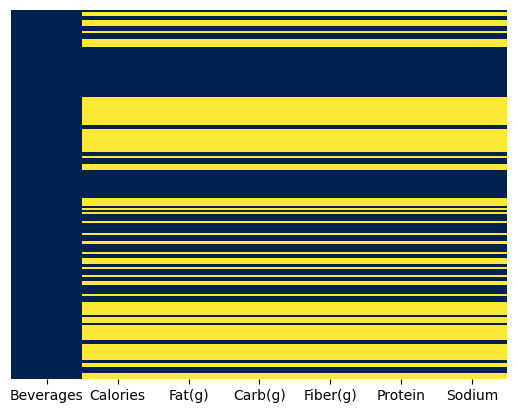

In [75]:
sns.heatmap(starbucks.isnull(),yticklabels=False,cbar=False,cmap='cividis')

From the above heatmap results there exist nul information, thus there is need to fill in n'a data. Below is the filling of the na's in this dataset

In [76]:
#Change NA to 0
starbucks['Calories'] = starbucks['Calories'].fillna(0)
starbucks['Fat(g)'] = starbucks['Fat(g)'].fillna(0)
starbucks['Carb(g)'] = starbucks['Carb(g)'].fillna(0)
starbucks['Fiber(g)'] = starbucks['Fiber(g)'].fillna(0)
starbucks['Protein'] = starbucks['Protein'].fillna(0)
starbucks['Sodium'] = starbucks['Sodium'].fillna(0)

In [77]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Beverages  177 non-null    object 
 1   Calories   177 non-null    float64
 2   Fat(g)     177 non-null    float64
 3   Carb(g)    177 non-null    float64
 4   Fiber(g)   177 non-null    float64
 5   Protein    177 non-null    float64
 6   Sodium     177 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


After na's filling the above infrmation show the summary of the dataset.

In [78]:
new_star = starbucks.dropna()
starbucks.duplicated().sum()
starbucks.drop_duplicates(inplace=True)
#We dropped all the cell that is not releveant to the analysis.

<AxesSubplot:>

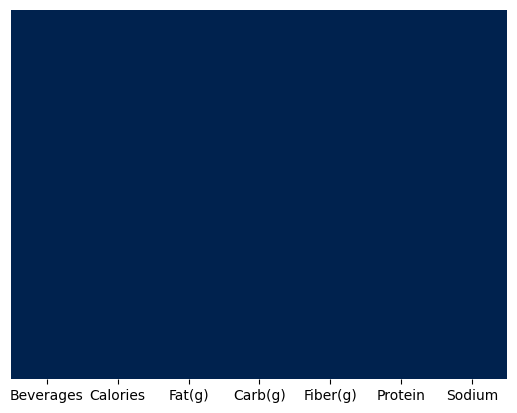

In [79]:
sns.heatmap(new_star.isnull(),yticklabels=False,cbar=False,cmap='cividis')

From the above new heatmap we now have clean dataset (there is no more missing values and na). We can proceed to explore the dataset.

In [80]:
new_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Beverages  177 non-null    object 
 1   Calories   177 non-null    float64
 2   Fat(g)     177 non-null    float64
 3   Carb(g)    177 non-null    float64
 4   Fiber(g)   177 non-null    float64
 5   Protein    177 non-null    float64
 6   Sodium     177 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


Information above shows the type of the data, all the columns are float except beverages which is an objects. 

In [81]:
new_star.describe()

Calories      Fat(g)     Carb(g)    Fiber(g)     Protein      Sodium
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000
mean    70.254237    1.214689   12.858757    0.231638    2.158192   30.112994
std     95.605533    3.030941   16.532590    1.043113    4.590981   57.100775
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
50%      5.000000    0.000000    0.000000    0.000000    0.000000    0.000000
75%    140.000000    0.000000   27.000000    0.000000    1.000000   15.000000
max    430.000000   26.000000   64.000000    8.000000   20.000000  240.000000

# 3- Distribution of the Datasets

In [82]:
new_star.columns

Index(['Beverages', 'Calories', 'Fat(g)', 'Carb(g)', 'Fiber(g)', 'Protein',
       'Sodium'],
      dtype='object')

Text(0.5, 1.0, 'Sodium Distribution Plot')

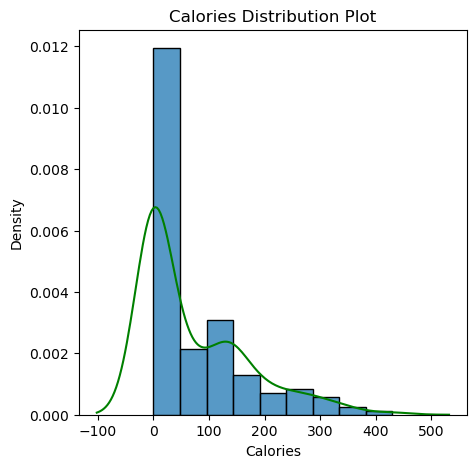

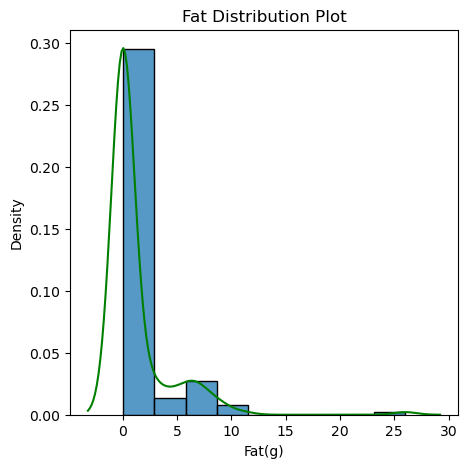

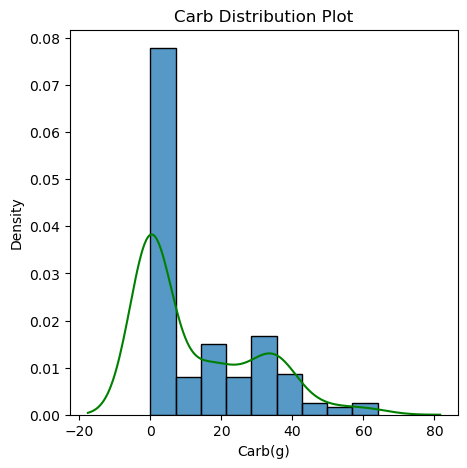

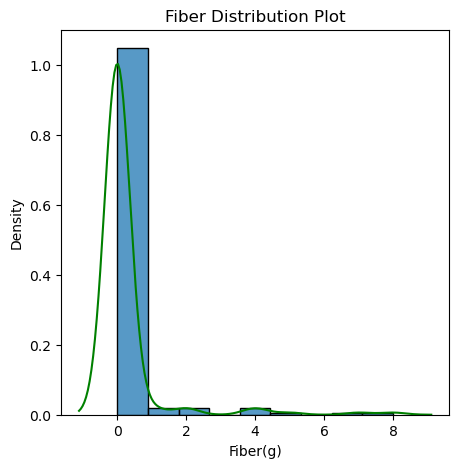

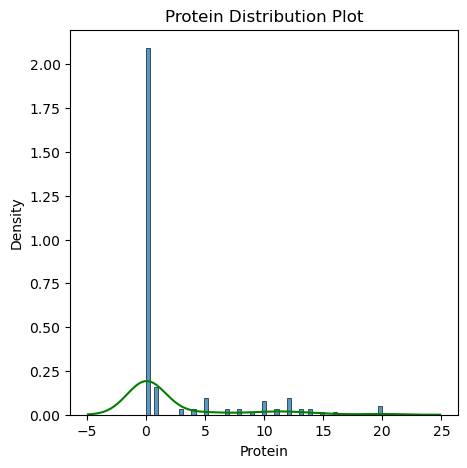

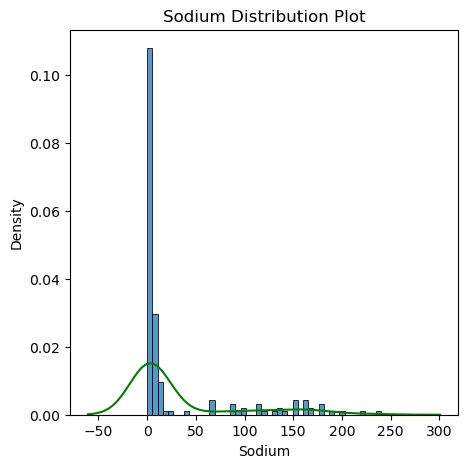

In [83]:
#calories
plt.figure(figsize=(5,5))
sns.histplot(new_star, x='Calories', stat='density')
sns.kdeplot(new_star['Calories'], color='green').set_title('Calories Distribution Plot')
#Fat
plt.figure(figsize=(5,5))
sns.histplot(new_star, x='Fat(g)', stat='density')
sns.kdeplot(new_star['Fat(g)'], color='green').set_title('Fat Distribution Plot')
#Carb
plt.figure(figsize=(5,5))
sns.histplot(new_star, x='Carb(g)', stat='density')
sns.kdeplot(new_star['Carb(g)'], color='green').set_title('Carb Distribution Plot')
#Fiber
plt.figure(figsize=(5,5))
sns.histplot(new_star, x='Fiber(g)', stat='density')
sns.kdeplot(new_star['Fiber(g)'], color='green').set_title('Fiber Distribution Plot')
#Protein
plt.figure(figsize=(5,5))
sns.histplot(new_star, x='Protein', stat='density')
sns.kdeplot(new_star['Protein'], color='green').set_title('Protein Distribution Plot')
#Sodium
plt.figure(figsize=(5,5))
sns.histplot(new_star, x='Sodium', stat='density')
sns.kdeplot(new_star['Sodium'], color='green').set_title('Sodium Distribution Plot')

The distribution of the dataset shows that there are some level of outliers in the dataset. Thus we proceed by logging for normality. 

# Beverages with Highest calories

[Text(0.5, 0, 'Beverages'), Text(0, 0.5, 'Average Calories'), Text(0.5, 1.0, 'Average Calories per Beverage')]


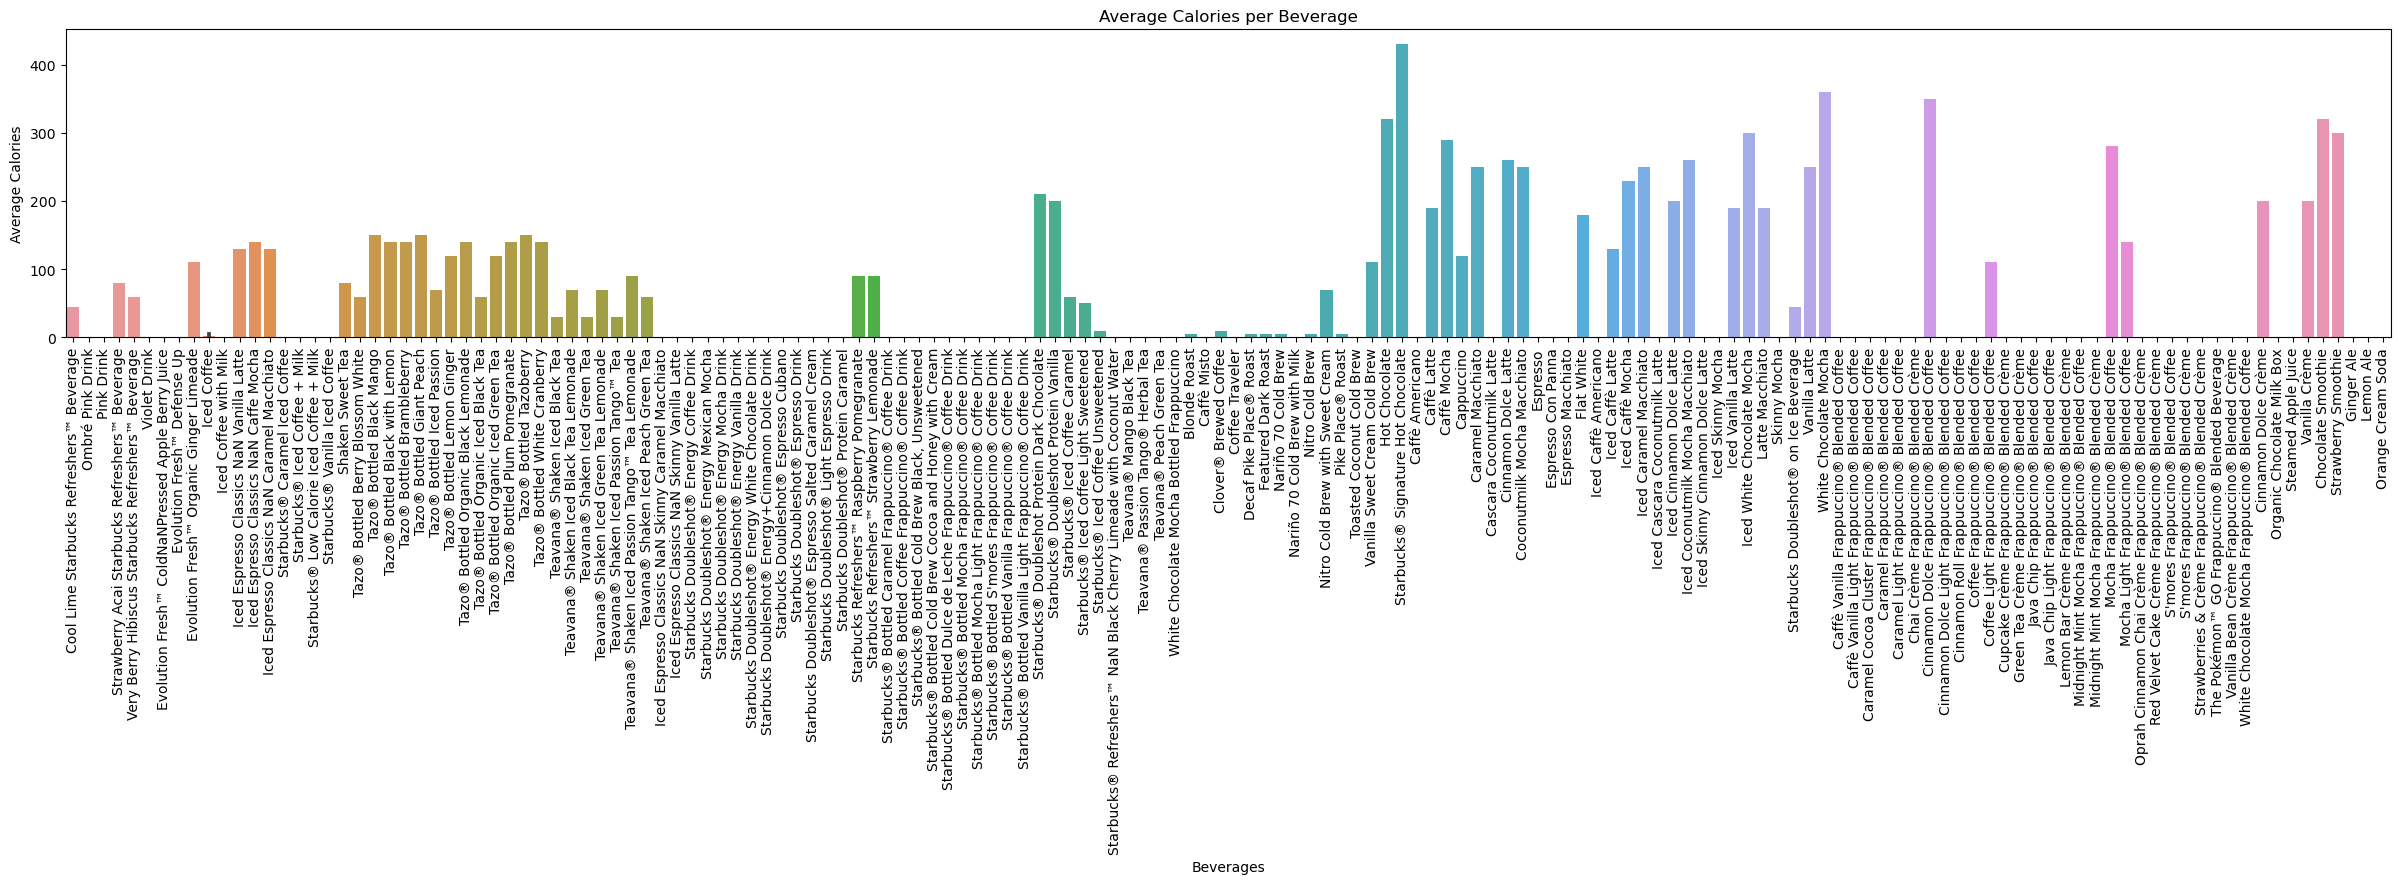

In [84]:
#calories
plt.figure(figsize=(30,4))
plot = sns.barplot(y=new_star['Calories'], x=new_star['Beverages']).set(xlabel='Beverages', ylabel='Average Calories', title='Average Calories per Beverage')
plt.xticks(rotation=90)
print(plot)

In [85]:
new_star.calories = new_star[['Beverages','Calories']]
new_star.calories.columns = ['Menu', 'Calories']
new_star.calories
new_star.calories.sort_values("Calories", ascending=False)

Menu  Calories
110                 Starbucks® Signature Hot Chocolate     430.0
139                              White Chocolate Mocha     360.0
146         Cinnamon Dolce Frappuccino® Blended Coffee     350.0
172                                 Chocolate Smoothie     320.0
109                                      Hot Chocolate     320.0
..                                                 ...       ...
52   Starbucks Doubleshot® Espresso Salted Caramel ...       0.0
53          Starbucks Doubleshot® Light Espresso Drink       0.0
54               Starbucks Doubleshot® Protein Caramel       0.0
57   Starbucks® Bottled Caramel Frappuccino® Coffee...       0.0
176                                  Orange Cream Soda       0.0

[177 rows x 2 columns]

Based on the plot above, the Beverages with the highest Calories are all round numbers. The most common beverages with highest Calories in it is 'Starbucks® Signature Hot Chocolate’s 110 with 430 calories and is not advisable for people who are on Calories deficit program (intermittent fasting) as a cup of this drink contains more than half of the required Calories needed for 1 day during the fasting program. To further explore this factor, the frequency at of Starbucks® Signature Hot Chocolate at 110 will be compared against 111.

# Beverages with Highest Fat(g)

[Text(0.5, 0, 'Beverages'), Text(0, 0.5, 'Average Fat(g)'), Text(0.5, 1.0, 'Average Fat (g) per Beverage')]


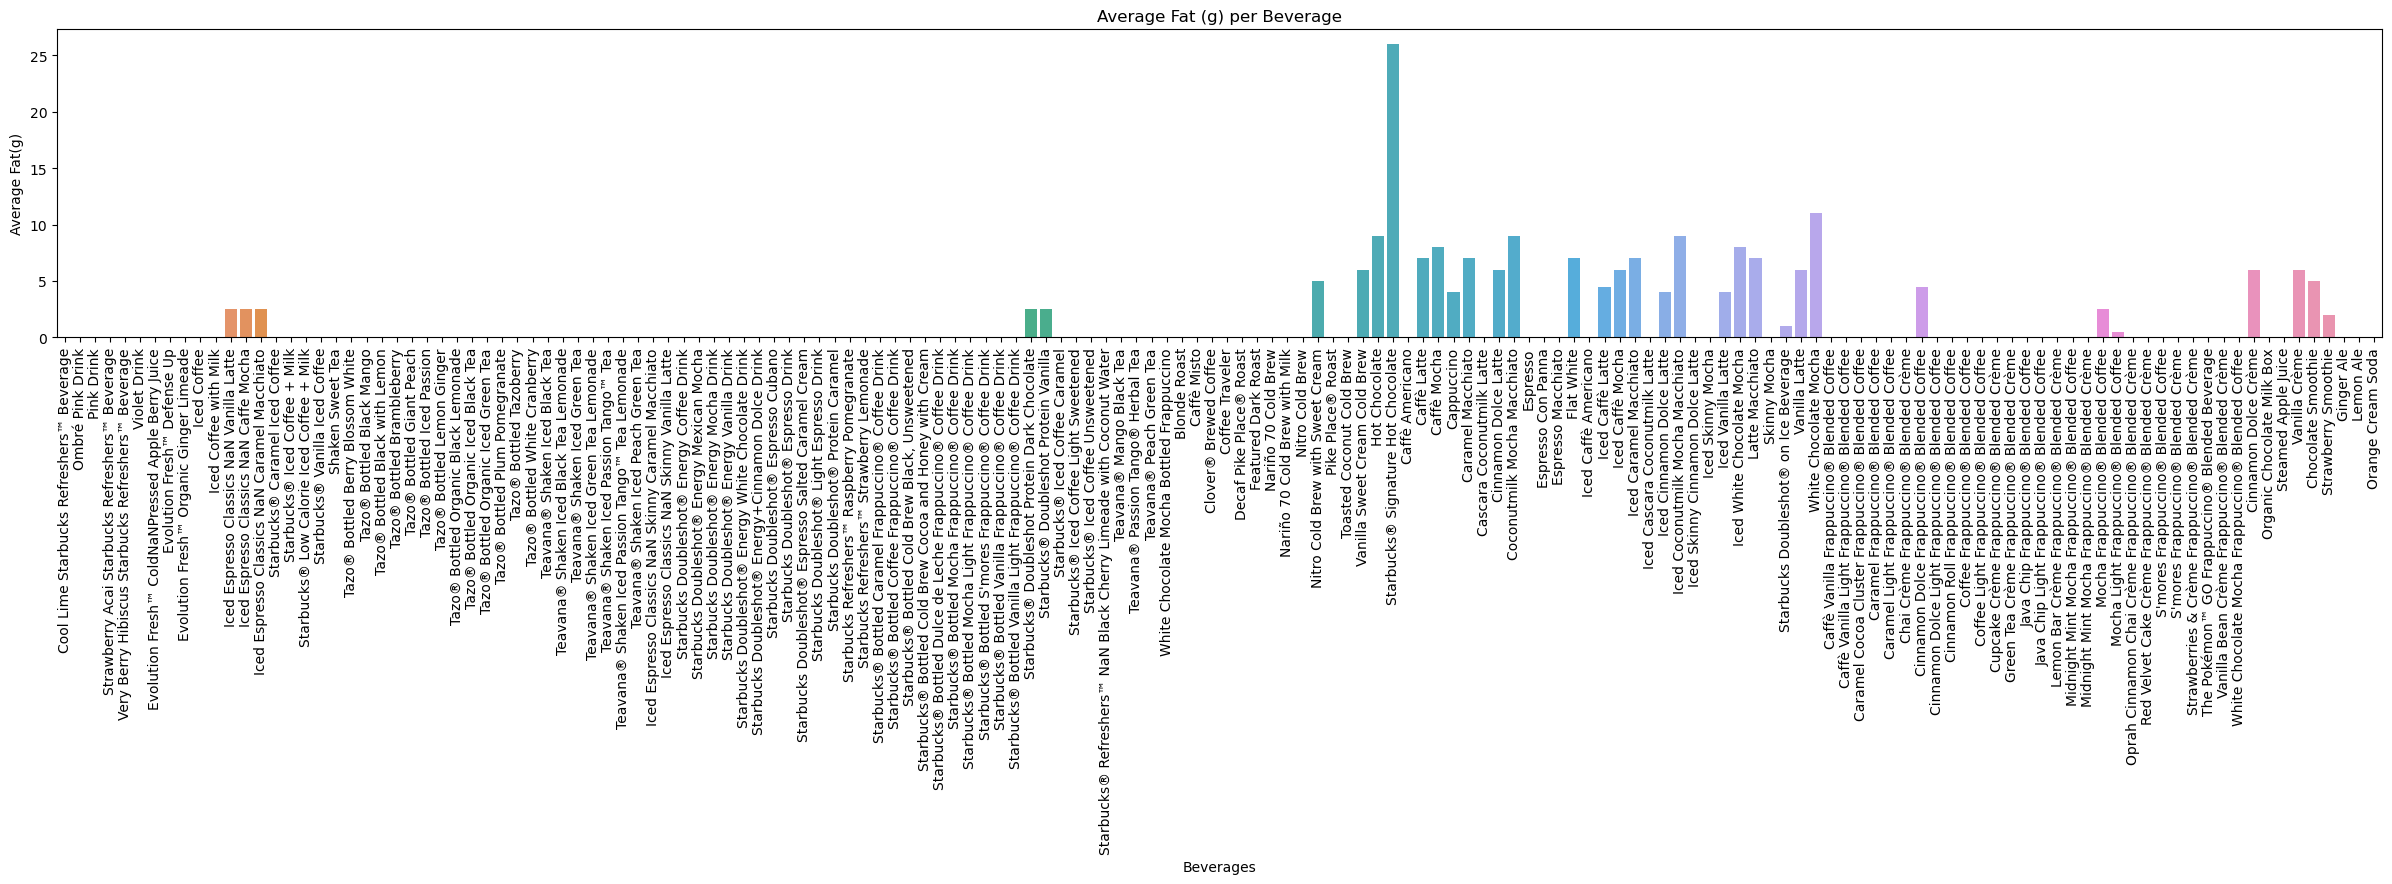

In [86]:
#Fat
plt.figure(figsize=(30,4))
plot = sns.barplot(y=new_star['Fat(g)'], x=new_star['Beverages']).set(xlabel='Beverages', ylabel='Average Fat(g)', title='Average Fat (g) per Beverage')
plt.xticks(rotation=90)
print(plot)

In [87]:
new_star.fat = new_star[['Beverages','Fat(g)']]
new_star.fat.columns = ['Menu', 'Fat(g)']
new_star.fat
new_star.fat.sort_values("Fat(g)", ascending=False)

Menu  Fat(g)
110                 Starbucks® Signature Hot Chocolate    26.0
139                              White Chocolate Mocha    11.0
129                   Iced Coconutmilk Mocha Macchiato     9.0
118                        Coconutmilk Mocha Macchiato     9.0
109                                      Hot Chocolate     9.0
..                                                 ...     ...
64   Starbucks® Bottled S'mores Frappuccino® Coffee...     0.0
65   Starbucks® Bottled Vanilla Frappuccino® Coffee...     0.0
66   Starbucks® Bottled Vanilla Light Frappuccino® ...     0.0
67                      Starbucks® Caramel Iced Coffee     0.0
176                                  Orange Cream Soda     0.0

[177 rows x 2 columns]

Based on the plot above, the Beverages with the highest frequency used Fat (g) are all round numbers. The most common beverages with highest Calories in it is 'Starbucks® Signature Hot Chocolate’s 110 with 26 Fat (g). To further explore this factor, the frequency at of Starbucks® Signature Hot Chocolate at 110 will be compared against 111.

# Beverages with Highest Carb(g)

[Text(0.5, 0, 'Beverages'), Text(0, 0.5, 'Average Carb(g)'), Text(0.5, 1.0, 'Average Fat (g) per Beverage')]


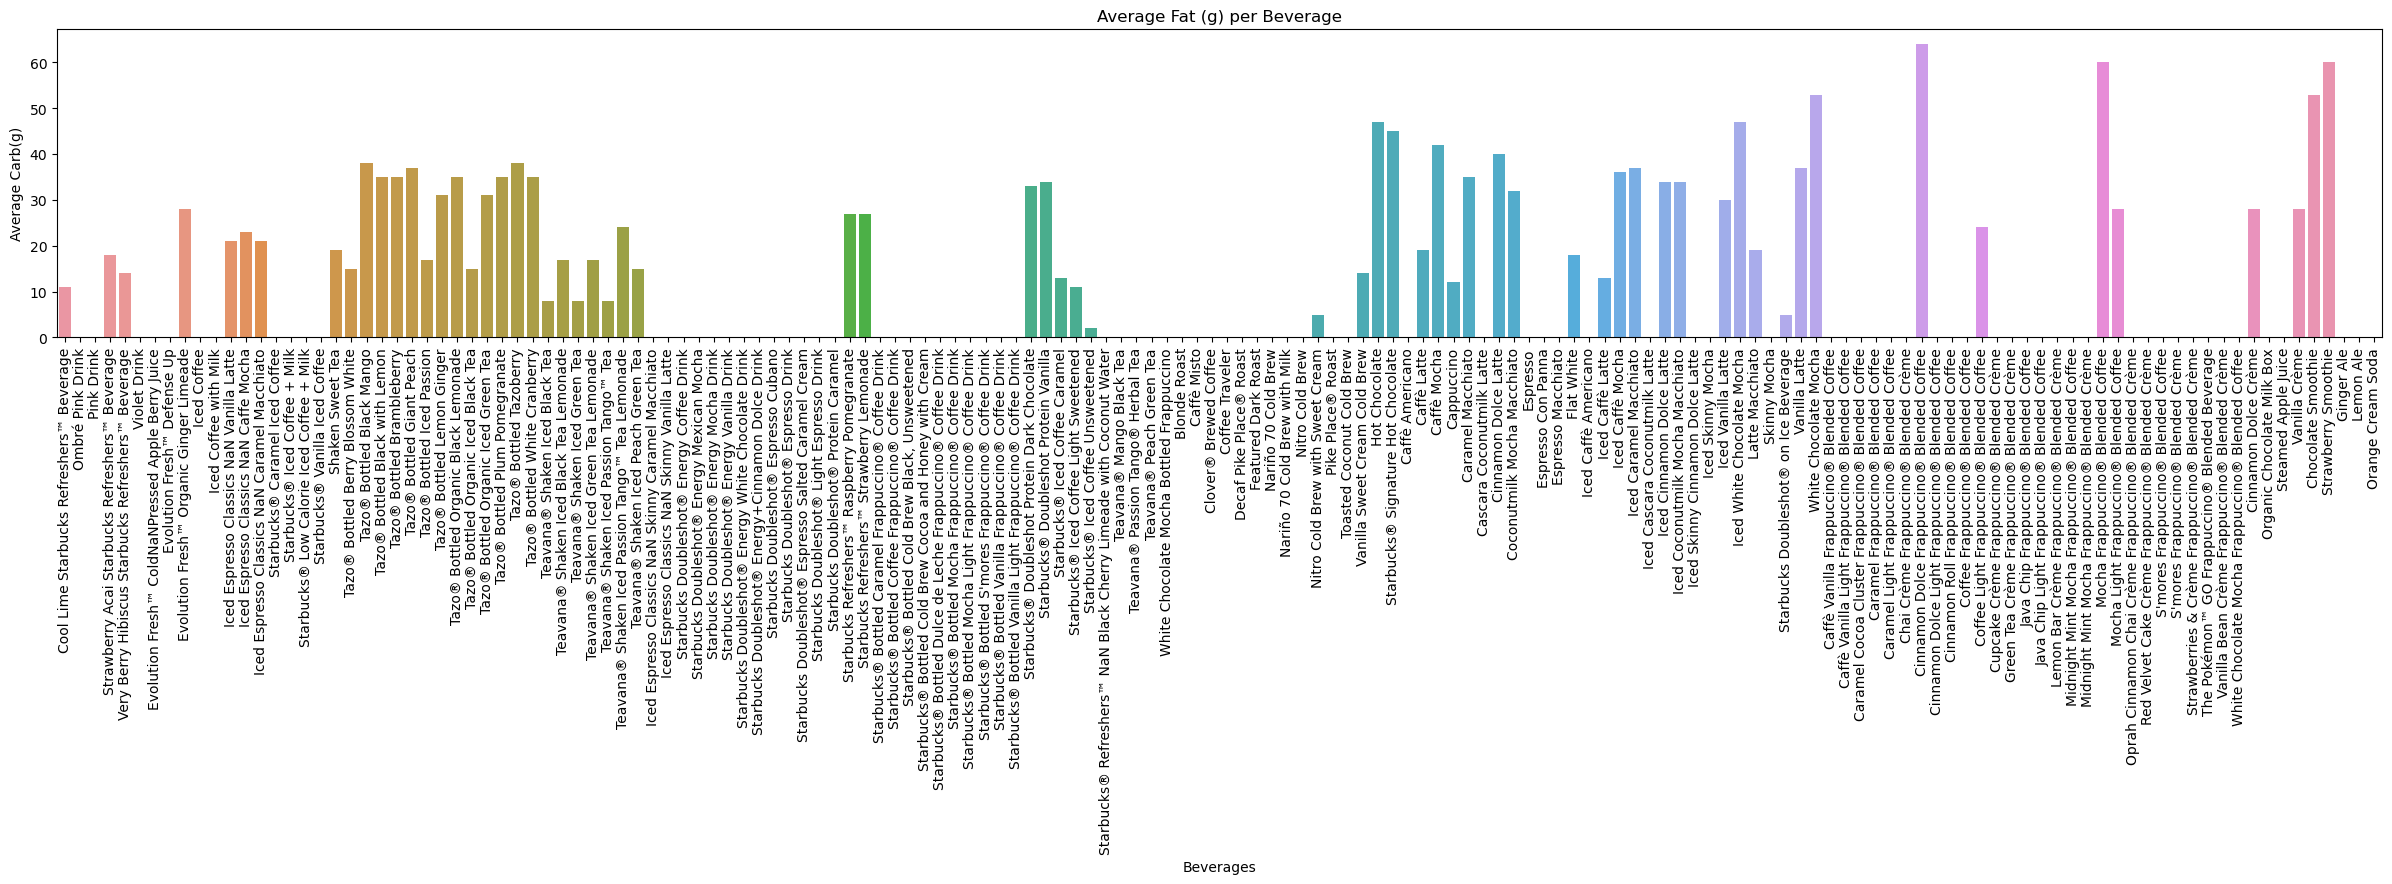

In [88]:
#Carb
plt.figure(figsize=(30,4))
plot = sns.barplot(y=new_star['Carb(g)'], x=new_star['Beverages']).set(xlabel='Beverages', ylabel='Average Carb(g)', title='Average Fat (g) per Beverage')
plt.xticks(rotation=90)
print(plot)

In [89]:
new_star.carb = new_star[['Beverages','Carb(g)']]
new_star.carb.columns = ['Menu', 'Carb(g)']
new_star.carb
new_star.carb.sort_values("Carb(g)", ascending=False)

Menu  Carb(g)
146       Cinnamon Dolce Frappuccino® Blended Coffee     64.0
173                              Strawberry Smoothie     60.0
158                Mocha Frappuccino® Blended Coffee     60.0
172                               Chocolate Smoothie     53.0
139                            White Chocolate Mocha     53.0
..                                               ...      ...
59   Starbucks® Bottled Cold Brew Black, Unsweetened      0.0
107                        Toasted Coconut Cold Brew      0.0
106                                Pike Place® Roast      0.0
104                                  Nitro Cold Brew      0.0
176                                Orange Cream Soda      0.0

[177 rows x 2 columns]

Based on the plot above, the Beverages with the highest frequency used Carb(g) are all round numbers. The most common beverages with highest Calories in it is 'Cinnamon Dolce Frappuccino® Blended Coffee' is 146 with 64 carbs To further explore this factor, the frequency at of 'Cinnamon Dolce Frappuccino® Blended Coffee' at 146 will be compared against 147.

# Beverages with Highest Fiber(g)

[Text(0.5, 0, 'Beverages'), Text(0, 0.5, 'Average Fiber(g)'), Text(0.5, 1.0, 'Average Fiber (g) per Beverage')]


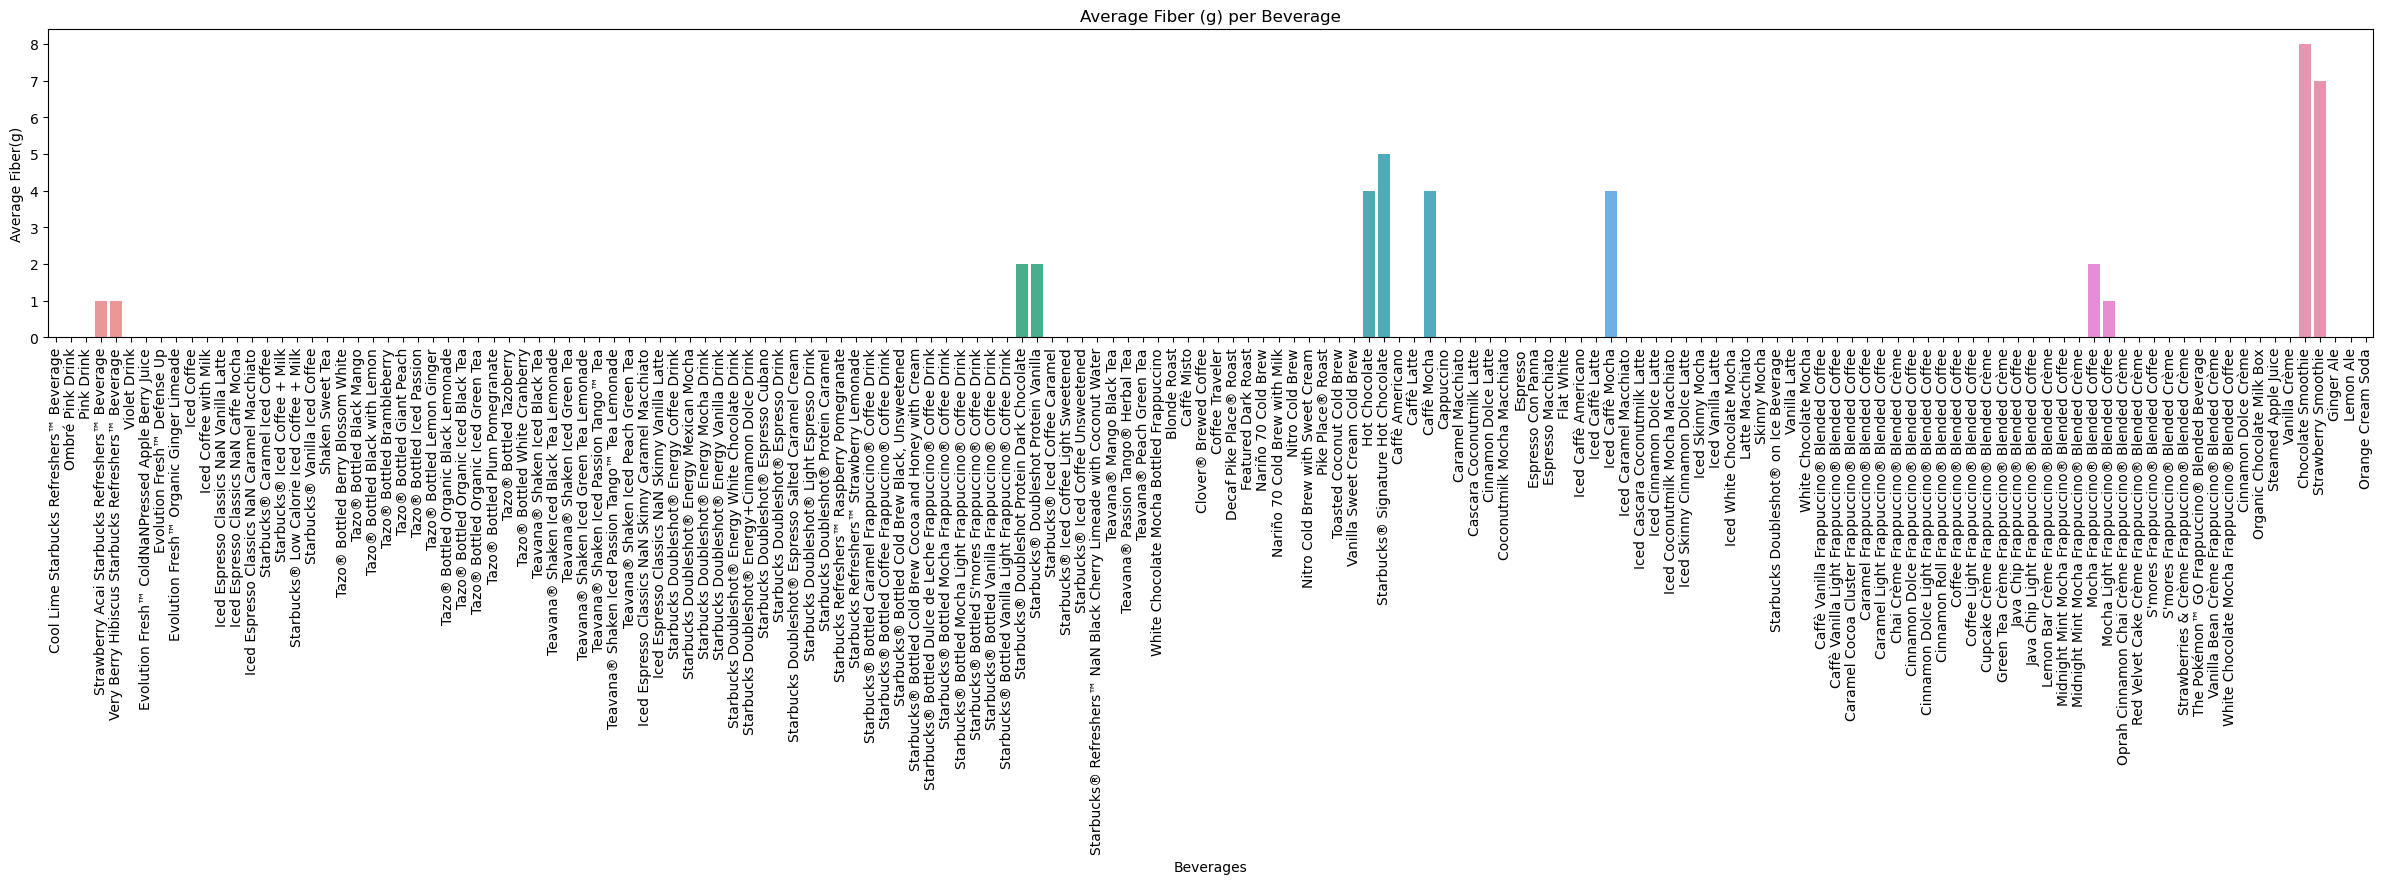

In [90]:
#Fiber
plt.figure(figsize=(30,4))
plot = sns.barplot(y=new_star['Fiber(g)'], x=new_star['Beverages']).set(xlabel='Beverages', ylabel='Average Fiber(g)', title='Average Fiber (g) per Beverage')
plt.xticks(rotation=90)
print(plot)

In [91]:
new_star.calories = new_star[['Beverages','Fiber(g)']]
new_star.calories.columns = ['Menu', 'Fiber(g)']
new_star.calories
new_star.calories.sort_values("Fiber(g)", ascending=False)

Menu  Fiber(g)
172                                 Chocolate Smoothie       8.0
173                                Strawberry Smoothie       7.0
110                 Starbucks® Signature Hot Chocolate       5.0
109                                      Hot Chocolate       4.0
125                                   Iced Caffè Mocha       4.0
..                                                 ...       ...
61   Starbucks® Bottled Dulce de Leche Frappuccino®...       0.0
62   Starbucks® Bottled Mocha Frappuccino® Coffee D...       0.0
63   Starbucks® Bottled Mocha Light Frappuccino® Co...       0.0
64   Starbucks® Bottled S'mores Frappuccino® Coffee...       0.0
176                                  Orange Cream Soda       0.0

[177 rows x 2 columns]

Based on the plot above, the Beverages with the highest frequency used Fibre(g) are all round numbers. The most common beverages with highest Fibre in it is 'Chocolate Smoothie' is 172 with 8 fibres To further explore this factor, the frequency at of 'Chocolate Smoothie' at 172 will be compared against 173.

# Beverages with Highest Protein

[Text(0.5, 0, 'Beverages'), Text(0, 0.5, 'Average Protein'), Text(0.5, 1.0, 'Average Protein per Beverage')]


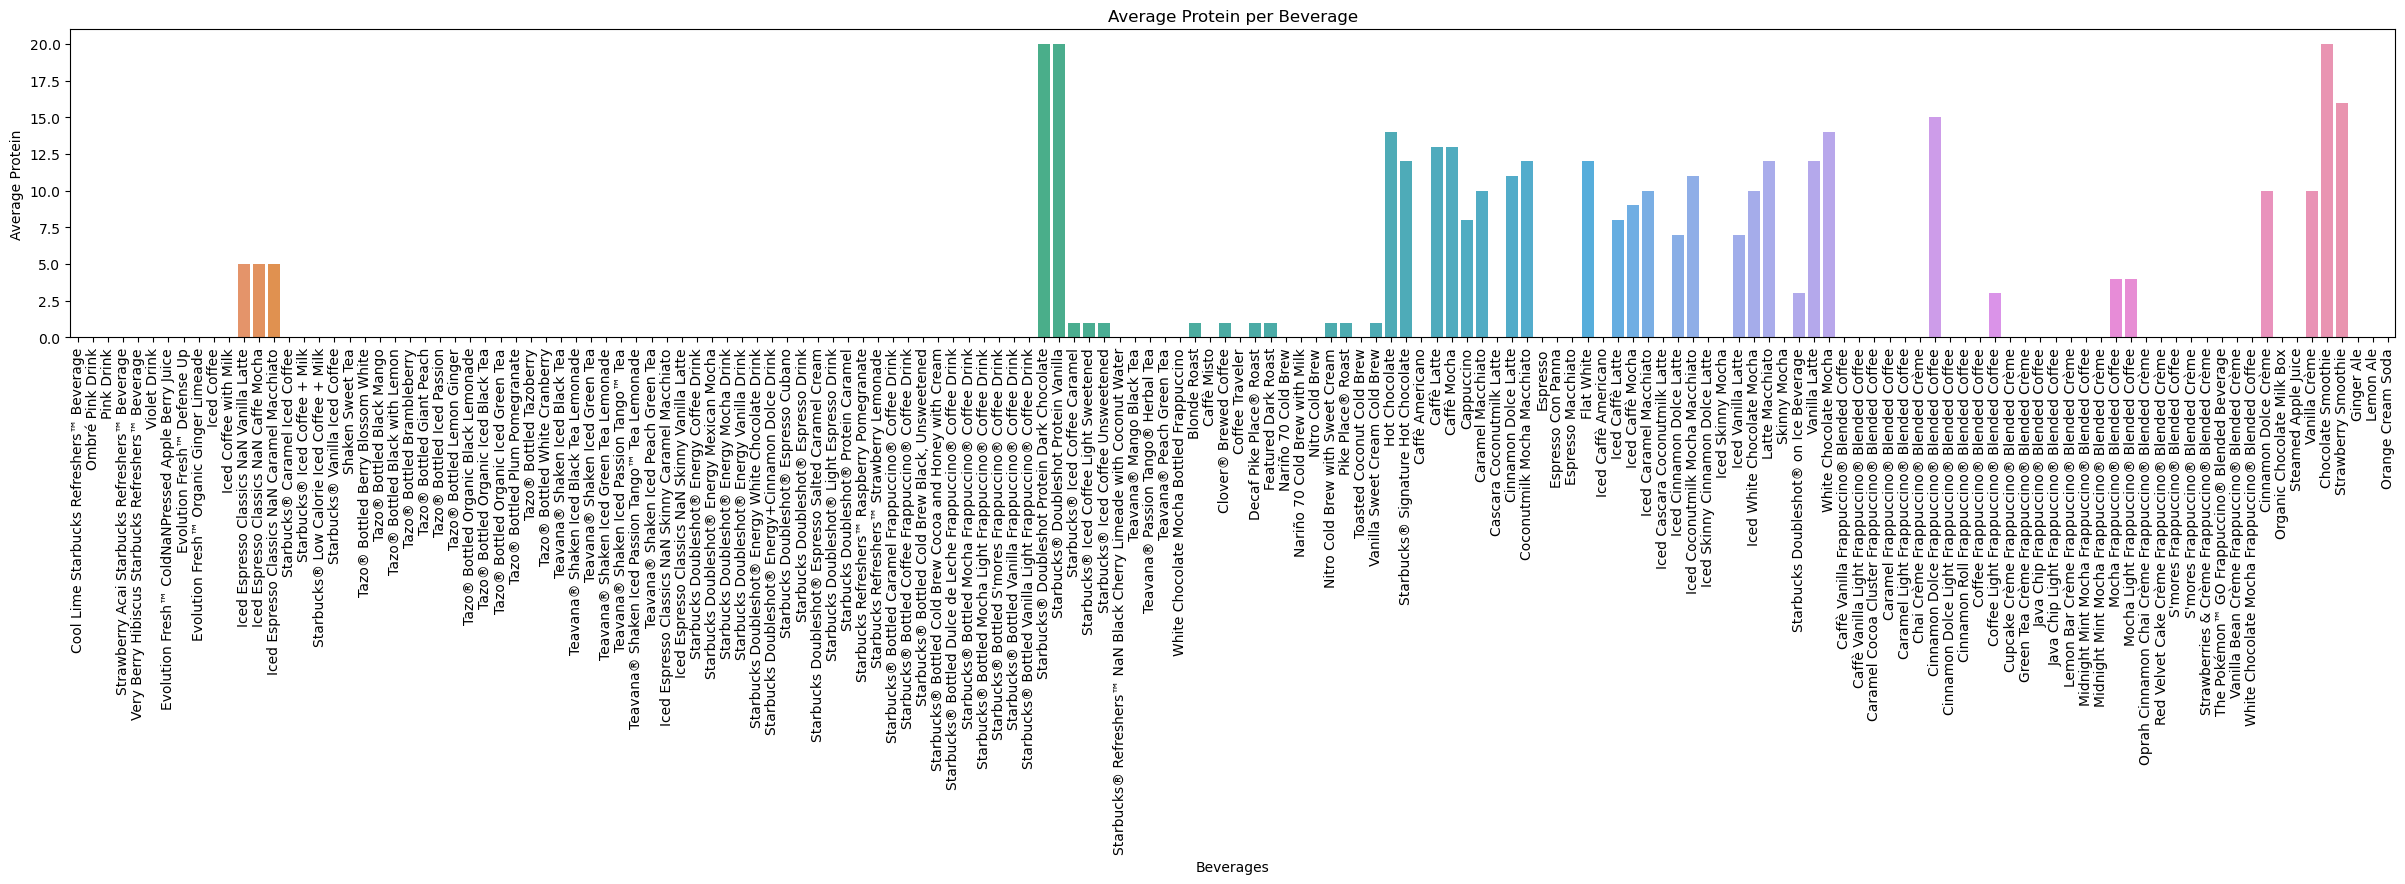

In [92]:
#Protein
plt.figure(figsize=(30,4))
plot = sns.barplot(y=new_star['Protein'], x=new_star['Beverages']).set(xlabel='Beverages', ylabel='Average Protein', title='Average Protein per Beverage')
plt.xticks(rotation=90)
print(plot)

In [93]:
new_star.protein = new_star[['Beverages','Protein']]
new_star.protein.columns = ['Menu', 'Protein']
new_star.protein
new_star.protein.sort_values("Protein", ascending=False)

Menu  Protein
68        Starbucks® Doubleshot Protein Dark Chocolate     20.0
172                                 Chocolate Smoothie     20.0
69               Starbucks® Doubleshot Protein Vanilla     20.0
173                                Strawberry Smoothie     16.0
146         Cinnamon Dolce Frappuccino® Blended Coffee     15.0
..                                                 ...      ...
62   Starbucks® Bottled Mocha Frappuccino® Coffee D...      0.0
63   Starbucks® Bottled Mocha Light Frappuccino® Co...      0.0
64   Starbucks® Bottled S'mores Frappuccino® Coffee...      0.0
65   Starbucks® Bottled Vanilla Frappuccino® Coffee...      0.0
176                                  Orange Cream Soda      0.0

[177 rows x 2 columns]

Based on the plot above, the Beverages with the highest frequency used Protein are all round numbers. The most common beverages with highest Protein in it is 'Starbucks® Doubleshot Protein Vanilla' is 69 with 20 fibres To further explore this factor, the frequency at of 'Starbucks® Doubleshot Protein Vanilla' at 69 will be compared against 70.

# Beverages with Highest Sodium

[Text(0.5, 0, 'Beverages'), Text(0, 0.5, 'Average Sodium'), Text(0.5, 1.0, 'Average Sodium per Beverage')]


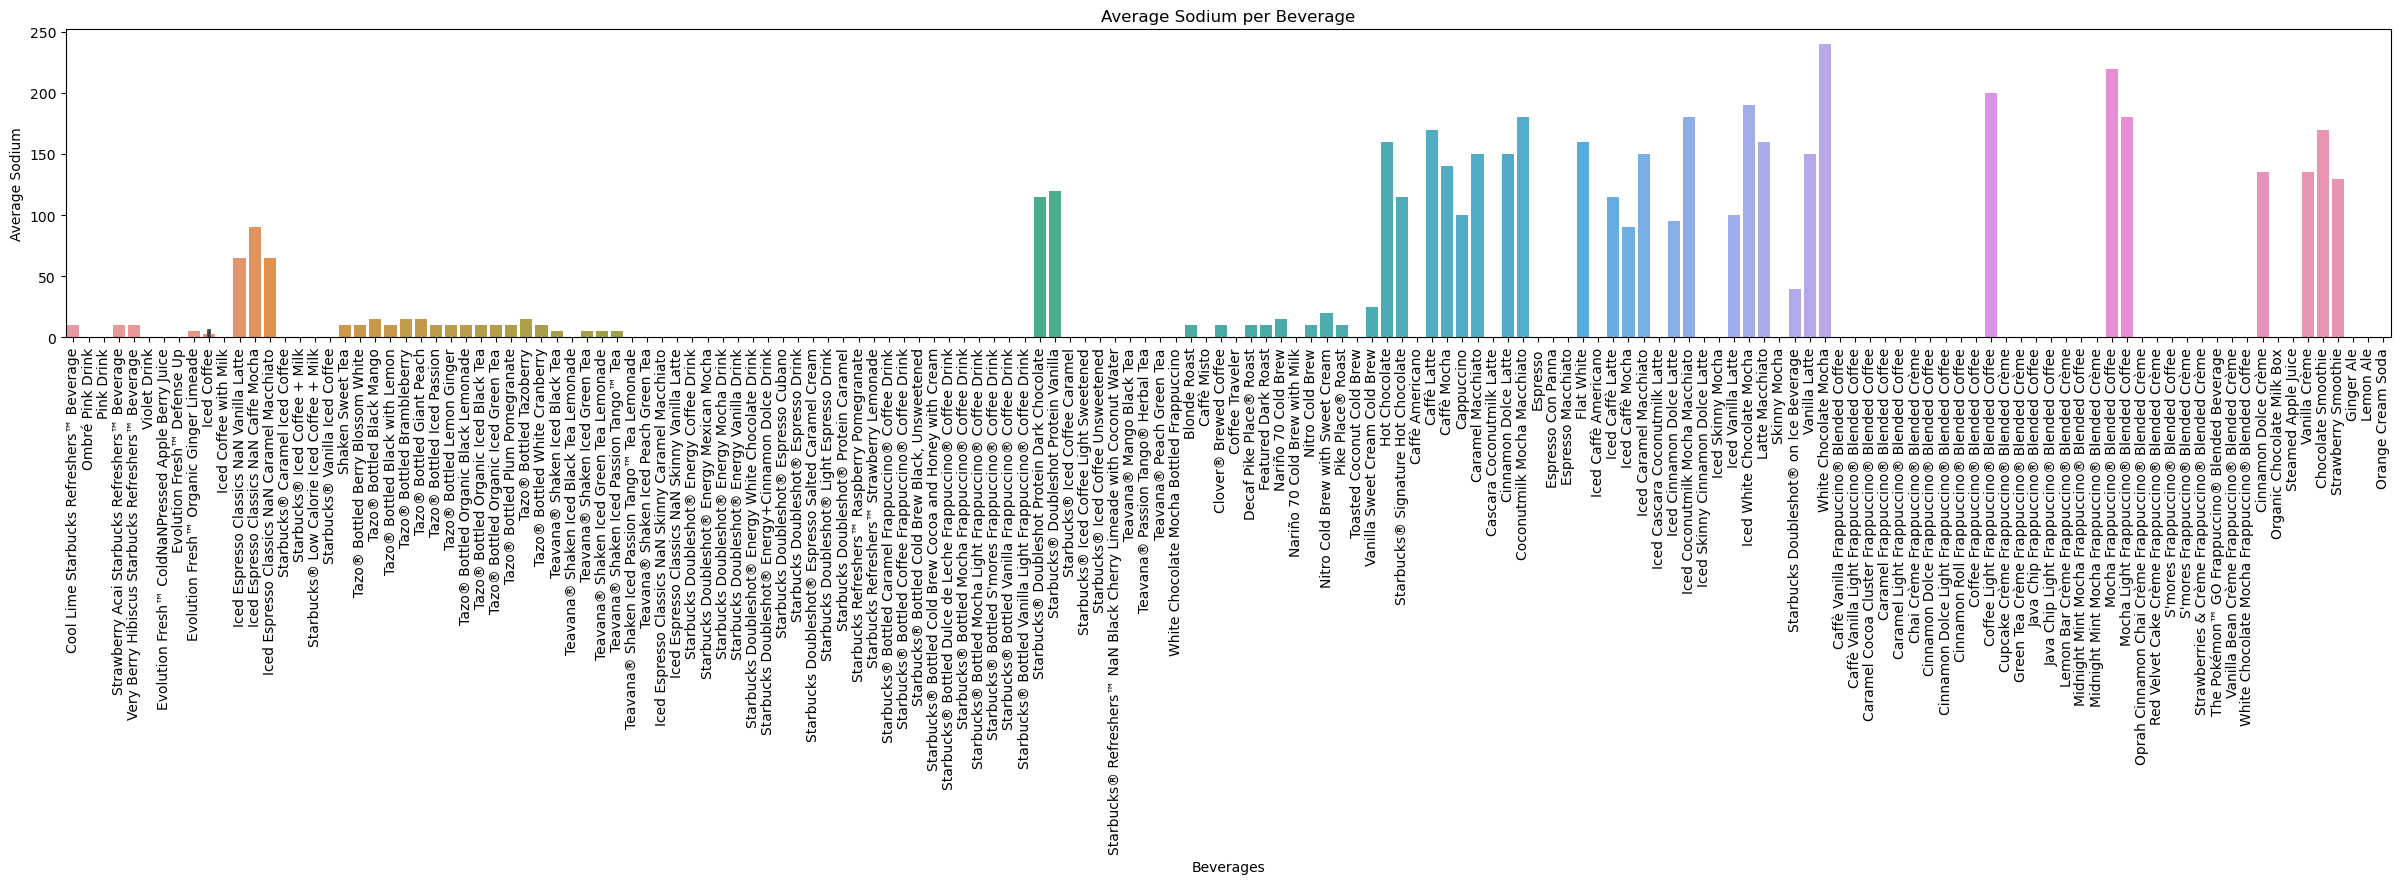

In [94]:
#Sodium
plt.figure(figsize=(30,4))
plot = sns.barplot(y=new_star['Sodium'], x=new_star['Beverages']).set(xlabel='Beverages', ylabel='Average Sodium', title='Average Sodium per Beverage')
plt.xticks(rotation=90)
print(plot)

In [95]:
new_star.sodium = new_star[['Beverages','Sodium']]
new_star.sodium.columns = ['Menu', 'Sodium']
new_star.sodium
new_star.sodium.sort_values("Sodium", ascending=False)

Menu  Sodium
139                              White Chocolate Mocha   240.0
158                  Mocha Frappuccino® Blended Coffee   220.0
150           Coffee Light Frappuccino® Blended Coffee   200.0
133                         Iced White Chocolate Mocha   190.0
129                   Iced Coconutmilk Mocha Macchiato   180.0
..                                                 ...     ...
48   Starbucks Doubleshot® Energy White Chocolate D...     0.0
93           White Chocolate Mocha Bottled Frappuccino     0.0
92                            Teavana® Peach Green Tea     0.0
91                  Teavana® Passion Tango® Herbal Tea     0.0
176                                  Orange Cream Soda     0.0

[177 rows x 2 columns]

Based on the plot above, the Beverages with the highest frequency used Sodium are all round numbers. The most common beverages with highest Protein in it is 'White Chocolate Mocha	' is 139 with 240 sodium. To further explore this factor, the frequency at of 'White Chocolate Mocha' at 139 will be compared against 140.

# Checking the distribution of variables using a Q-Q plot
A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a roughly straight line. That is, if the data falls in a straight line then the variable follows normal distribution otherwise not.

In [96]:
data_set = new_star

In [97]:
data_set.skew()

Calories    1.349434
Fat(g)      4.135430
Carb(g)     0.989101
Fiber(g)    5.385882
Protein     2.195423
Sodium      1.923177
dtype: float64

The variables with skewness > 1 are highly positively skewed. This shows that all the variables are highly positively skewed. The variables with skewness < -1 are highly negatively skewed. The variables with 0.5 < skewness < 1 are moderately positively skewed. The variables with -0.5 < skewness < -1 moderately negatively skewed. And, the variables with -0.5 < skewness < 0.5 are symmetric

From the Skewness and KDE plots, we have seen that the Calories, Carb, and Sodium variables are highly positively skewed. Let us plot the Q-Q plot for the Calories variable and check.

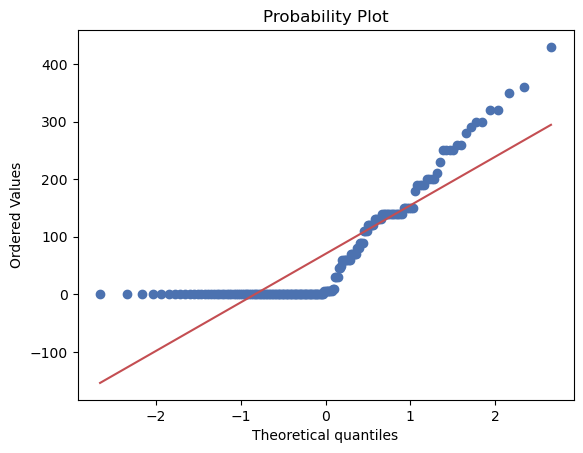

In [98]:
stats.probplot(new_star.Calories,plot=pylab);

# Transformations to change the distribution of features
Until now, we have seen how to check the distribution of the feature. This section will convert the variables into the normal distribution if they are not. For this purpose, we will work on a single feature Calories. In addition, thereafter log the other variables. First, defining a function in python, which will take data, feature name as inputs, and return the KDE plot and Q-Q plot of the feature.

# 4 - Log of Data

#Calories

[Text(0.5, 0, 'Calories')]

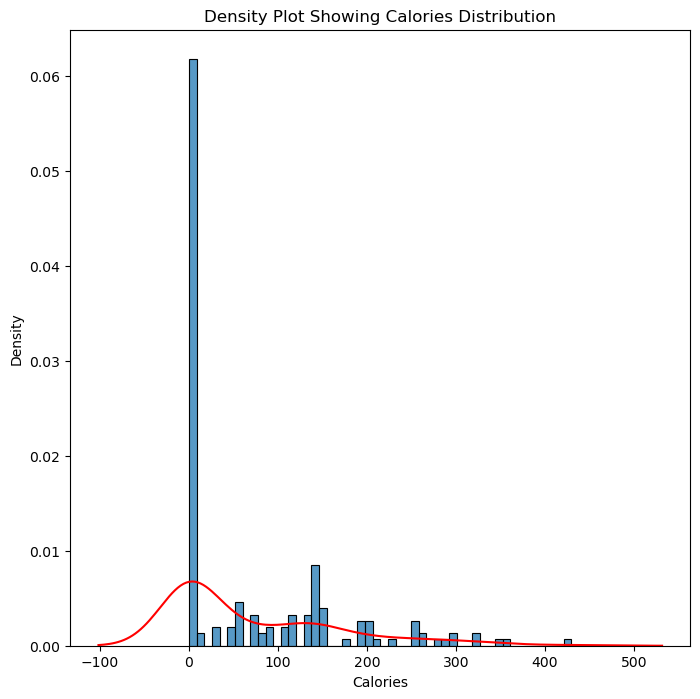

In [99]:
#function to return plots for the feature
#plt.figure(figsize=(10,5))
#plt.subplot(1,2,1)
#sns.kdeplot(new_star['Calories'])
#plt.subplot(1,2,2)
#stats.probplot(new_star['Calories'],plot=pylab)

plt.figure(figsize=(8,8))
lc = sns.histplot(new_star, x='Calories', stat='density', bins=50)
lc1 = sns.kdeplot(new_star['Calories'], color='red')
lc1.set_title('Density Plot Showing Calories Distribution')
lc1.set(xlabel='Calories')

The distribution changed slightly and looks moderately skewed now. More data points are also falling on the line in the Q-Q plot.

[Text(0.5, 0, 'Log of Calories')]

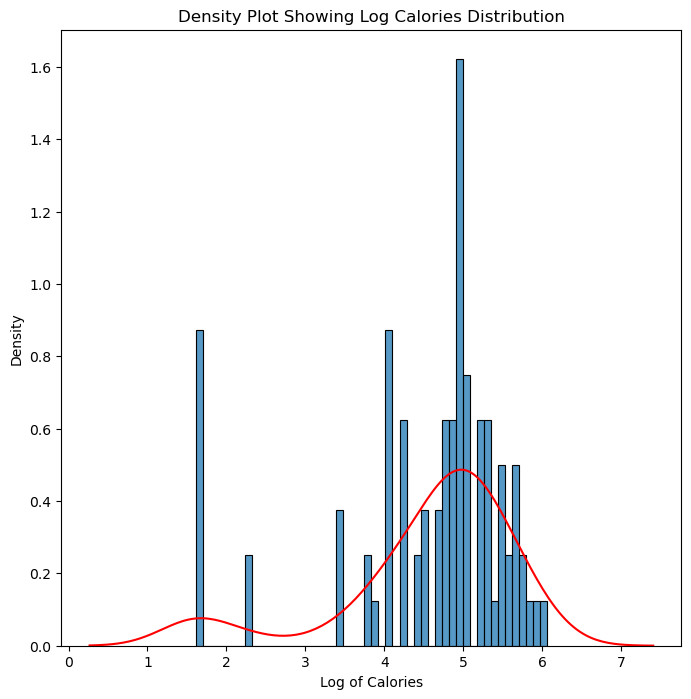

In [100]:
#Performing the transformations on the Calories variable.

# Logarithmic Transformation – This will convert the Calories value to its log value i.e log(Calories)
#performing logarithmic transformation on the feature
new_star['calories_log']=np.log(new_star['Calories'])
#plotting to check the transformation
plt.figure(figsize=(8,8))
lc = sns.histplot(new_star, x='calories_log', stat='density', bins=50)
lc1 = sns.kdeplot(new_star['calories_log'], color='red')
lc1.set_title('Density Plot Showing Log Calories Distribution')
lc1.set(xlabel='Log of Calories')

The distribution changed slightly and looks moderately skewed now. More data points are also falling on the line in the Q-Q plot.

In [101]:
#Reciprocal Transformation – This will inverse values of Calories i.e1/Calories
#new_star['calories_reciprocal']=1/new_star.Calories
#plotting to check the transformation
#plt.figure(figsize=(8,8))
#res = sns.histplot(new_star, x='calories_reciprocal', stat='density', bins=50)
#res1 = sns.kdeplot(new_star['calories_reciprocal'], color='red')
#res1.set_title('Density Plot Showing Reciprocal of Calories Distribution')
#res1.set(xlabel='Reciprocal of Calories')

The Reciprocal Transformation has kind of converted the feature to normal distribution. Most of the data points are also falling on the line in the Q-Q plot. This one is the same as the log transformation for the Calories feature.

In [102]:
#Square Root Transformation – This transformation will take the square root of the Price column i.e sqrt(Calorie).
#new_star['calories_sqroot']=np.sqrt(new_star.Calories)
#plotting to check the transformation
#plt.figure(figsize=(8,8))
#res = sns.histplot(new_star, x='calories_sqroot', stat='density', bins=50)
#res1 = sns.kdeplot(new_star['calories_sqroot'], color='red')
#res1.set_title('Density Plot Showing Root of Calories Distribution')
#res1.set(xlabel='Root of Calories')

The Reciprocal Transformation has kind of converted the feature to normal distribution. Most of the data points are also falling on the line in the Q-Q plot. This one is also the same as the log transformation for the Calories feature.

Since outlier remain in the calories column, the next section of code will see if it have been reduced at all as a result of the nomarlity transformation. The outlier will be found by calculating the interquartile range and counting how many value fall outside of the upper and lower limits. 

Outliers in Calories: 2
Outliers in Log Calories: 0


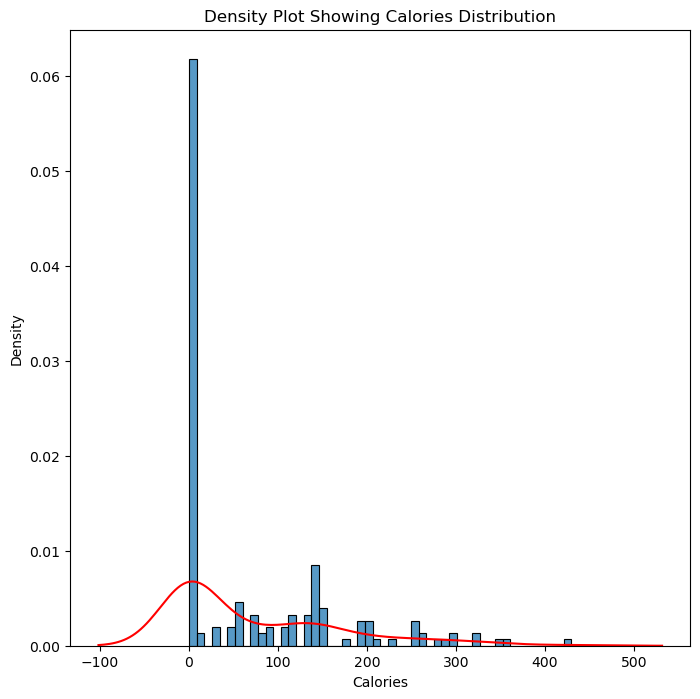

In [103]:
plt.figure(figsize=(8,8))
lc = sns.histplot(new_star, x='Calories', stat='density', bins=50)
lc1 = sns.kdeplot(new_star['Calories'], color='red')
lc1.set_title('Density Plot Showing Calories Distribution')
lc1.set(xlabel='Calories')


#Calories outliers
Q1 = data_set.Calories.quantile(0.25)
Q3 = data_set.Calories.quantile(0.75)
IQR = Q3 - Q1

out_calories = (new_star['Calories'] < (Q1 - 1.5 * IQR)) | (new_star['Calories'] > (Q3 + 1.5 * IQR))

#Outliers in Log Calories
Q1log = data_set.calories_log.quantile(0.25)
Q3log = data_set.calories_log.quantile(0.75)
IQR_log = Q3log - Q1log

out_log = (new_star['calories_log'] < (Q1log - 1.5 * IQR_log)) | (new_star['calories_log'] > (Q3log + 1.5 * IQR_log))


#Outliers in Root Calories
#Q1log = new_star.calories_log.quantile(0.25)
#Q3log = new_star.calories_log.quantile(0.75)
#IQR_log = Q3log - Q1log

#out_root = (new_star['calories_sqroot'] < (Q1log - 1.5 * IQR_log)) | (new_star['calories_sqroot'] > (Q3log + 1.5 * IQR_log))


#Outliers in Root Calories
#Q1log = new_star.calories_log.quantile(0.25)
#Q3log = new_star.calories_log.quantile(0.75)
#IQR_log = Q3log - Q1log

#out_resi = (new_star['calories_reciprocal'] < (Q1log - 1.5 * IQR_log)) | (new_star['calories_reciprocal'] > (Q3log + 1.5 * IQR_log))

#Print Results
print('Outliers in Calories: ' + str(len(out_calories[out_calories].index)))
print('Outliers in Log Calories: ' + str(len(out_log[out_log].index)))
#print('Outliers in Root Calories: ' + str(len(out_root[out_root].index)))
#print('Outliers in Reciprocal Calories: ' + str(len(out_resi[out_resi].index)))

The above analysis 
From the print statements above, it is clear that log, root, and reciprocal transformation has reduced the number of outlier to zero. Originally, only two outliers were available and it has reduced to respectively. This shows that log, root, and reciprocal transformation are useful for the statistical analysis later on.

# Log transformation of Fat(g), Carb(g), Fiber(g), Protein, and Sodium 

In [104]:
# Logarithmic Transformation – Fat(g)
new = new_star['fat_log']=np.log(new_star['Fat(g)'])
# Logarithmic Transformation – Carb(g)
new = new_star['carb_log']=np.log(new_star['Carb(g)'])
# Logarithmic Transformation – Fiber(g)
new = new_star['fiber_log']=np.log(new_star['Fiber(g)'])
# Logarithmic Transformation – Protein
new = new_star['protein_log']=np.log(new_star['Protein'])
# Logarithmic Transformation – Sodium)
new = new_star['sodium_log']=np.log(new_star['Sodium'])

# 5 - Analysis of the Data

# Correlation Analysis using Pearson Correlation Coeficient

Text(0.5, 1.0, 'Pearson Correlation Matrix')

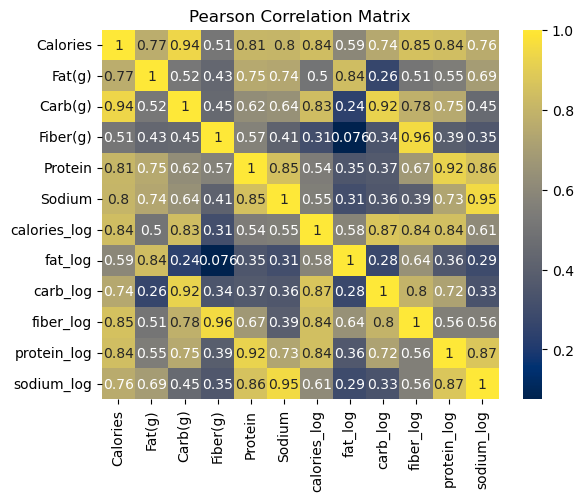

In [105]:
corrx = sns.heatmap(new_star.corr(method='pearson'), annot=True, cmap='cividis')
corrx.set_title('Pearson Correlation Matrix')

The table above shows strong and positive relationship between variables. In addition, the log variables (log of calories have strong positive relationship with other log variables, log of only have strong positive relationship with log of fibre, and so on. There is strong and positive correlation between log of calories and other variables. 

# Box plot

Text(0, 0.5, 'Log of Calories')

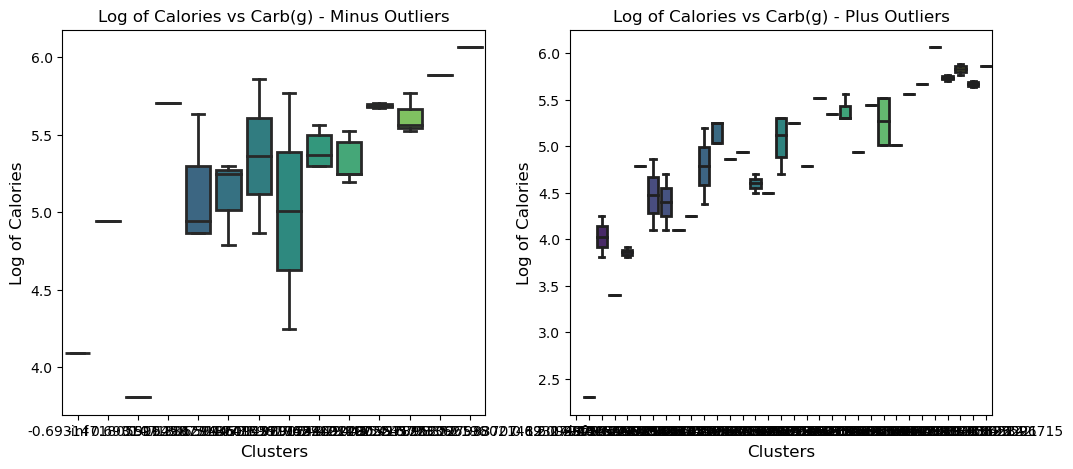

In [106]:
f, axes = plt.subplots(1,2)
f.set_size_inches(12, 5)
#Subplot
ax = sns.boxplot(y='calories_log', x = 'fat_log', data=new_star, orient='v', ax=axes[0],
                showfliers=False, linewidth=2, palette='viridis')
ax.set_title('Log of Calories vs Carb(g) - Minus Outliers', size=12)
ax.set_xlabel('Clusters', fontsize=12)
ax.set_ylabel('Log of Calories', fontsize=12)

#Subplot
ax = sns.boxplot(y='calories_log', x = 'carb_log', data=new_star, orient='v', ax=axes[1],
                showfliers=False, linewidth=2, palette='viridis')
ax.set_title('Log of Calories vs Carb(g) - Plus Outliers', size=12)
ax.set_xlabel('Clusters', fontsize=12)
ax.set_ylabel('Log of Calories', fontsize=12)


<AxesSubplot:>

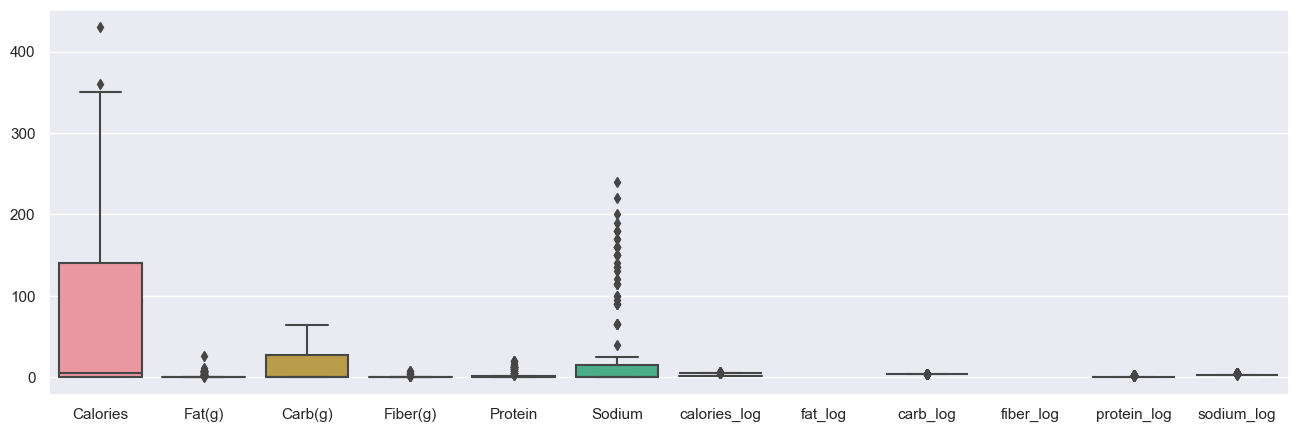

In [107]:
#Box plot for all the numerical variables
sns.set(rc={'figure.figsize': (16, 5)})
 
# multiple box plot illustration
sns.boxplot(data=new_star.select_dtypes(include='number'))

# - 3D Plot of some Variables

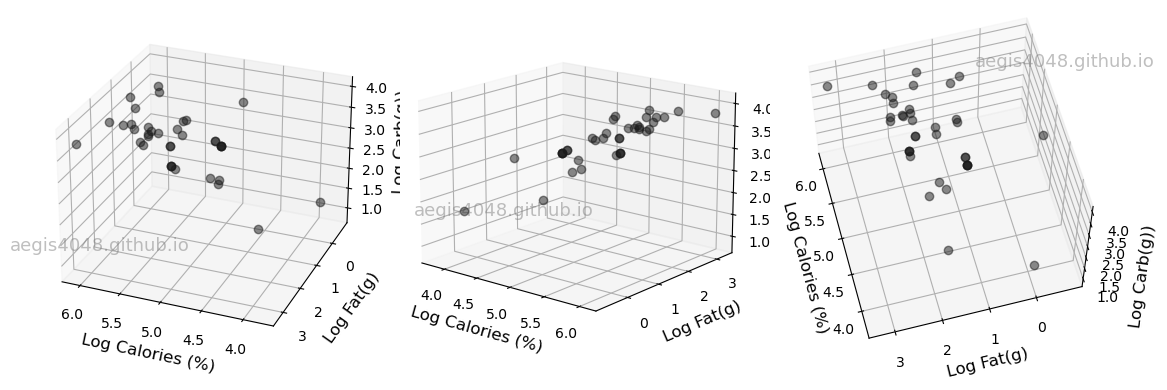

In [108]:
x = new_star['calories_log']
y = new_star['fat_log']
z = new_star['carb_log']

x_pred = np.linspace(6, 24, 30)   
y_pred = np.linspace(0.93, 2.9, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.set_xlabel('Log Calories (%)', fontsize=12)
    ax.set_ylabel('Log Fat(g)', fontsize=12)
    ax.set_zlabel('Log Carb(g))', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()

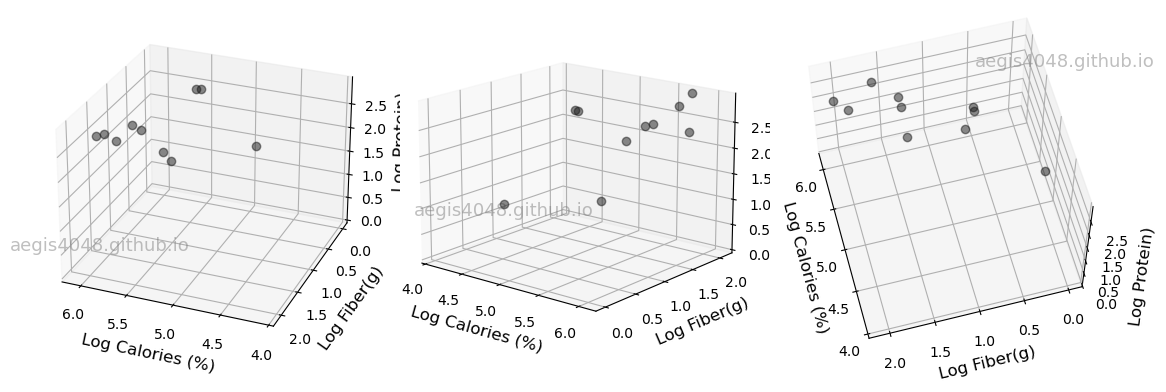

In [109]:
x = new_star['calories_log']
y = new_star['fiber_log']
z = new_star['protein_log']

x_pred = np.linspace(6, 24, 30)     
y_pred = np.linspace(0.93, 2.9, 30)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.set_xlabel('Log Calories (%)', fontsize=12)
    ax.set_ylabel('Log Fiber(g)', fontsize=12)
    ax.set_zlabel('Log Protein)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()

The above 3D plot shows that there is no linear relationship betweeen log of Calories, and others

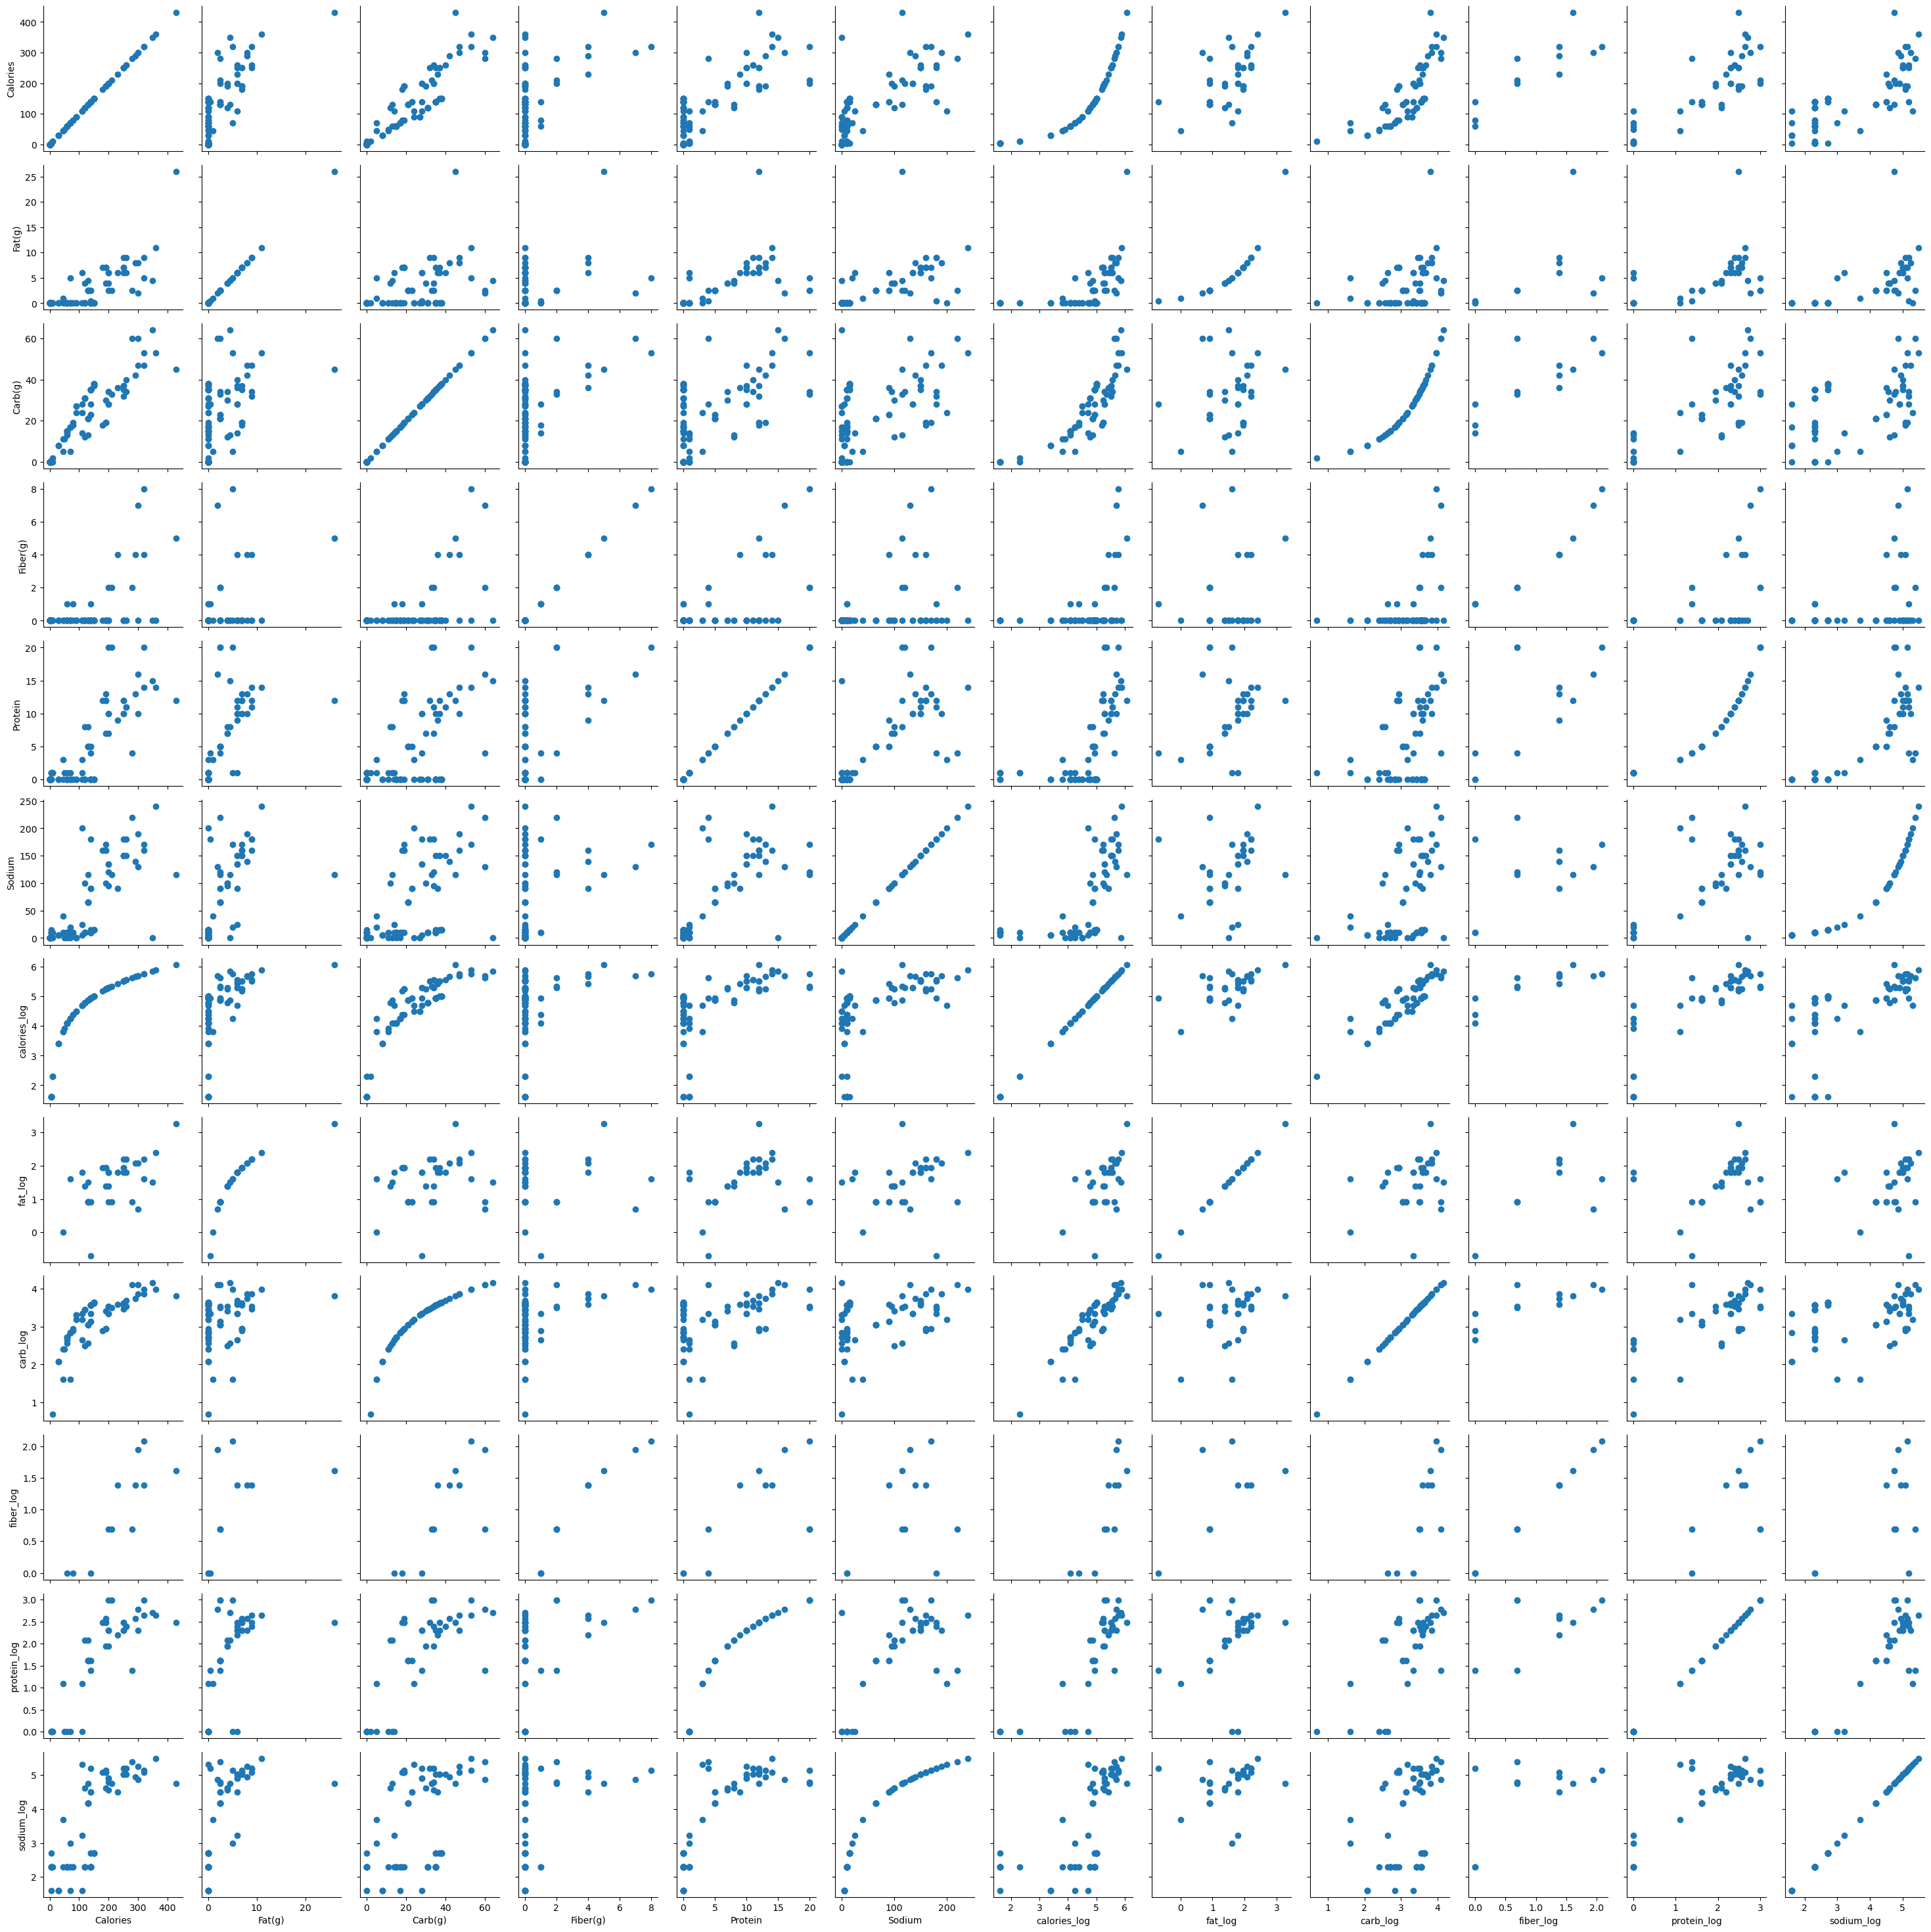

In [110]:
grids = sns.PairGrid(new_star)
grids.map(plt.scatter)

Here, sns.PairGrid() create a pairwise grid of variables in a dataset and the map function map the relationship among variables to the grids.

In [111]:
# to interacte  with plot
  
# creating random dataset
#zs = new_star['Calories']
#dx = new_star['Sodium']
#dy = new_star['Carb(g)']
#dz = new_star['Fiber(g)'] 
  
# creating figure
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
  
# creating the plot
#plot_geeks = ax.bar3d(xs, ys, zs, dx, 
                      #dy, dz, color='green')
  
#setting title and labels
#ax.set_title("3D bar plot")
#ax.set_xlabel('x-axis')
#ax.set_ylabel('y-axis')
#ax.set_zlabel('z-axis')
  
# displaying the plot
#plt.show()

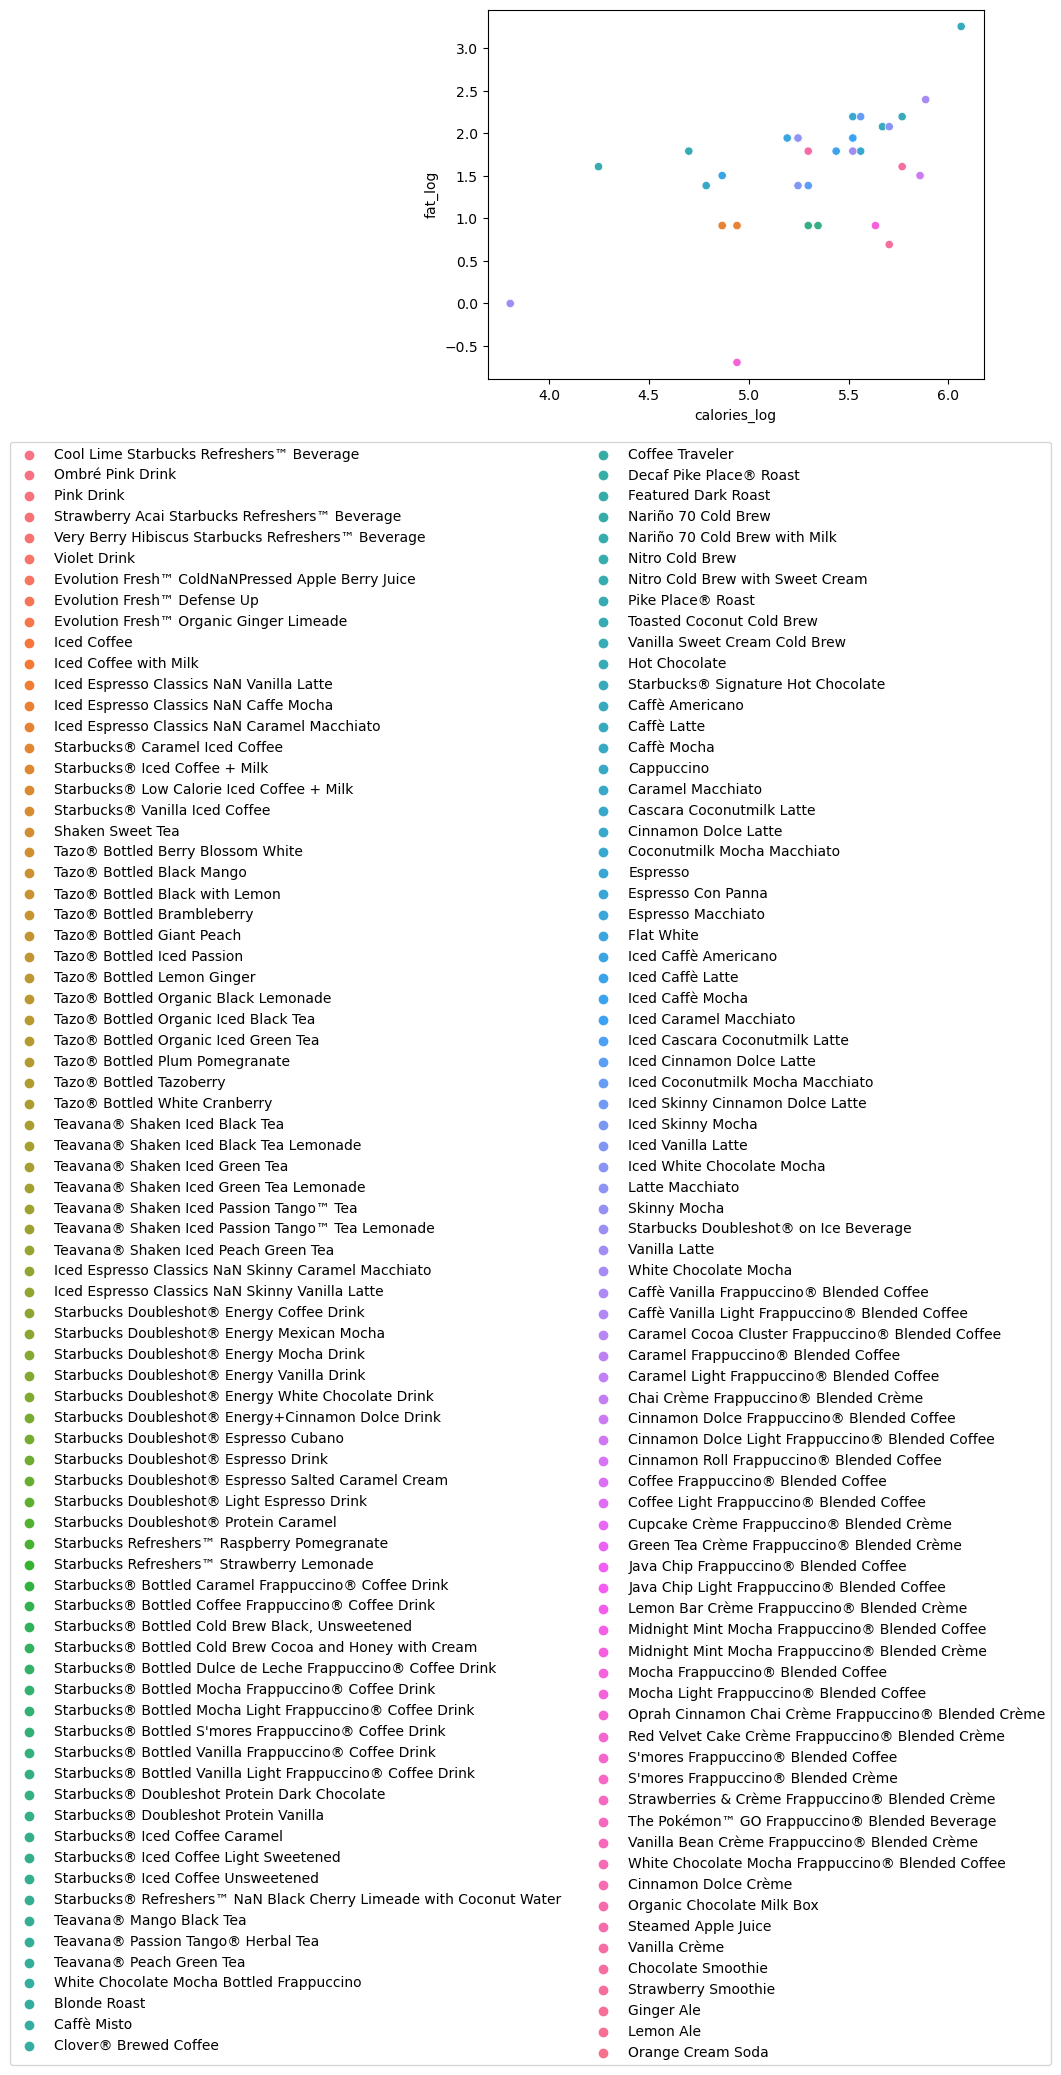

In [112]:
sns.scatterplot(data=new_star, x="calories_log", y="fat_log", hue="Beverages")
plt.legend(loc="best", bbox_to_anchor=(1.15, -0.15), ncol= 2)
plt.show()

# Statistics-Based Data Analysis

K-Means Clustering

K-Means will be performed based on the top 10% of components of beverages in the data into K number of groups. 

In [173]:
X = np.asarray(new_star[['Calories', 'Fat(g)', 'Carb(g)','Fiber(g)', 'Protein', 'Sodium']])
X[0:5]

array([[45.,  0., 11.,  0.,  0., 10.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [80.,  0., 18.,  1.,  0., 10.],
       [60.,  0., 14.,  1.,  0., 10.]])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 972.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 972.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 972.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 972.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 972.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 907.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, it

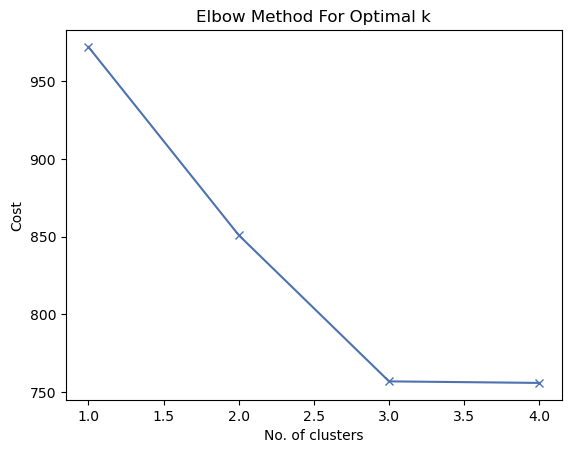

In [174]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(new_star)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [175]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(new_star)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 970.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10, cost: 851.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 925.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 874.0
Best run was number 2


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=uint16)

In [177]:
new_star.insert(0, "Cluster", clusters, True)
new_star

Cluster                                          Beverages  Calories  \
0          1           Cool Lime Starbucks Refreshers™ Beverage      45.0   
1          0                                   Ombré Pink Drink       0.0   
2          0                                         Pink Drink       0.0   
3          1     Strawberry Acai Starbucks Refreshers™ Beverage      80.0   
4          1  Very Berry Hibiscus Starbucks Refreshers™ Beve...      60.0   
..       ...                                                ...       ...   
172        0                                 Chocolate Smoothie     320.0   
173        0                                Strawberry Smoothie     300.0   
174        0                                         Ginger Ale       0.0   
175        0                                          Lemon Ale       0.0   
176        0                                  Orange Cream Soda       0.0   

     Fat(g)  Carb(g)  Fiber(g)  Protein  Sodium  calories_log   fat_log  \
0       0.0     11.0       0.0      0.0    10.0      3.806662      -inf   
1       0.0      0.0       0.0      0.0     0.0          -inf      -inf   
2       0.0      0.0       0.0      0.0     0.0          -inf      -inf   
3       0.0     18.0       1.0      0.0    10.0      4.382027      -inf   
4       0.0     14.0       1.0      0.0    10.0      4.094345      -inf   
..      ...      ...       ...      ...     ...           ...       ...   
172     5.0     53.0       8.0     20.0   170.0      5.768321  1.609438   
173     2.0     60.0       7.0     16.0   130.0      5.703782  0.693147   
174     0.0      0.0       0.0      0.0     0.0          -inf      -inf   
175     0.0      0.0       0.0      0.0     0.0          -inf      -inf   
176     0.0      0.0       0.0      0.0     0.0          -inf      -inf   

     carb_log  fiber_log  protein_log  sodium_log  Labels  Clust  
0    2.397895       -inf         -inf    2.302585       0      0  
1        -inf       -inf         -inf        -inf       0      0  
2        -inf       -inf         -inf        -inf       0      0  
3    2.890372   0.000000         -inf    2.302585       2      0  
4    2.639057   0.000000         -inf    2.302585       0      0  
..        ...        ...          ...         ...     ...    ...  
172  3.970292   2.079442     2.995732    5.135798       4      1  
173  4.094345   1.945910     2.772589    4.867534       4      1  
174      -inf       -inf         -inf        -inf       0      0  
175      -inf       -inf         -inf        -inf       0      0  
176      -inf       -inf         -inf        -inf       0      0  

[177 rows x 16 columns]

The method (Elbow method) is probably the most popular method to determine the optimal number of clusters. Though finding elbow points can be a challenge, because in practice there may not be a sharp elbow. From the above plot of k-means, the elbow point is 2.

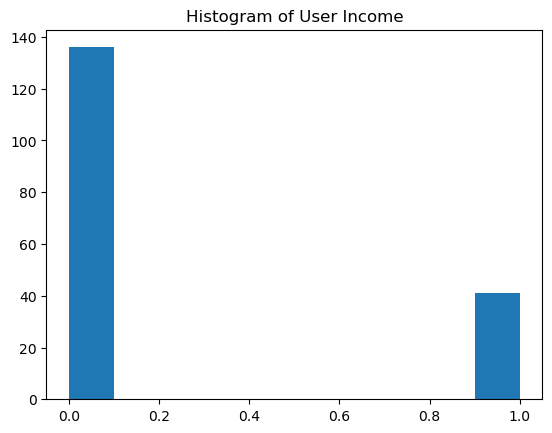

In [178]:
plt.hist(new_star.Cluster)
plt.title('Histogram of Clusters')
plt.show();

[Text(0.5, 0, 'Cluster'), Text(0, 0.5, 'Beverages'), Text(0.5, 1.0, 'Beverages in Cluster')]


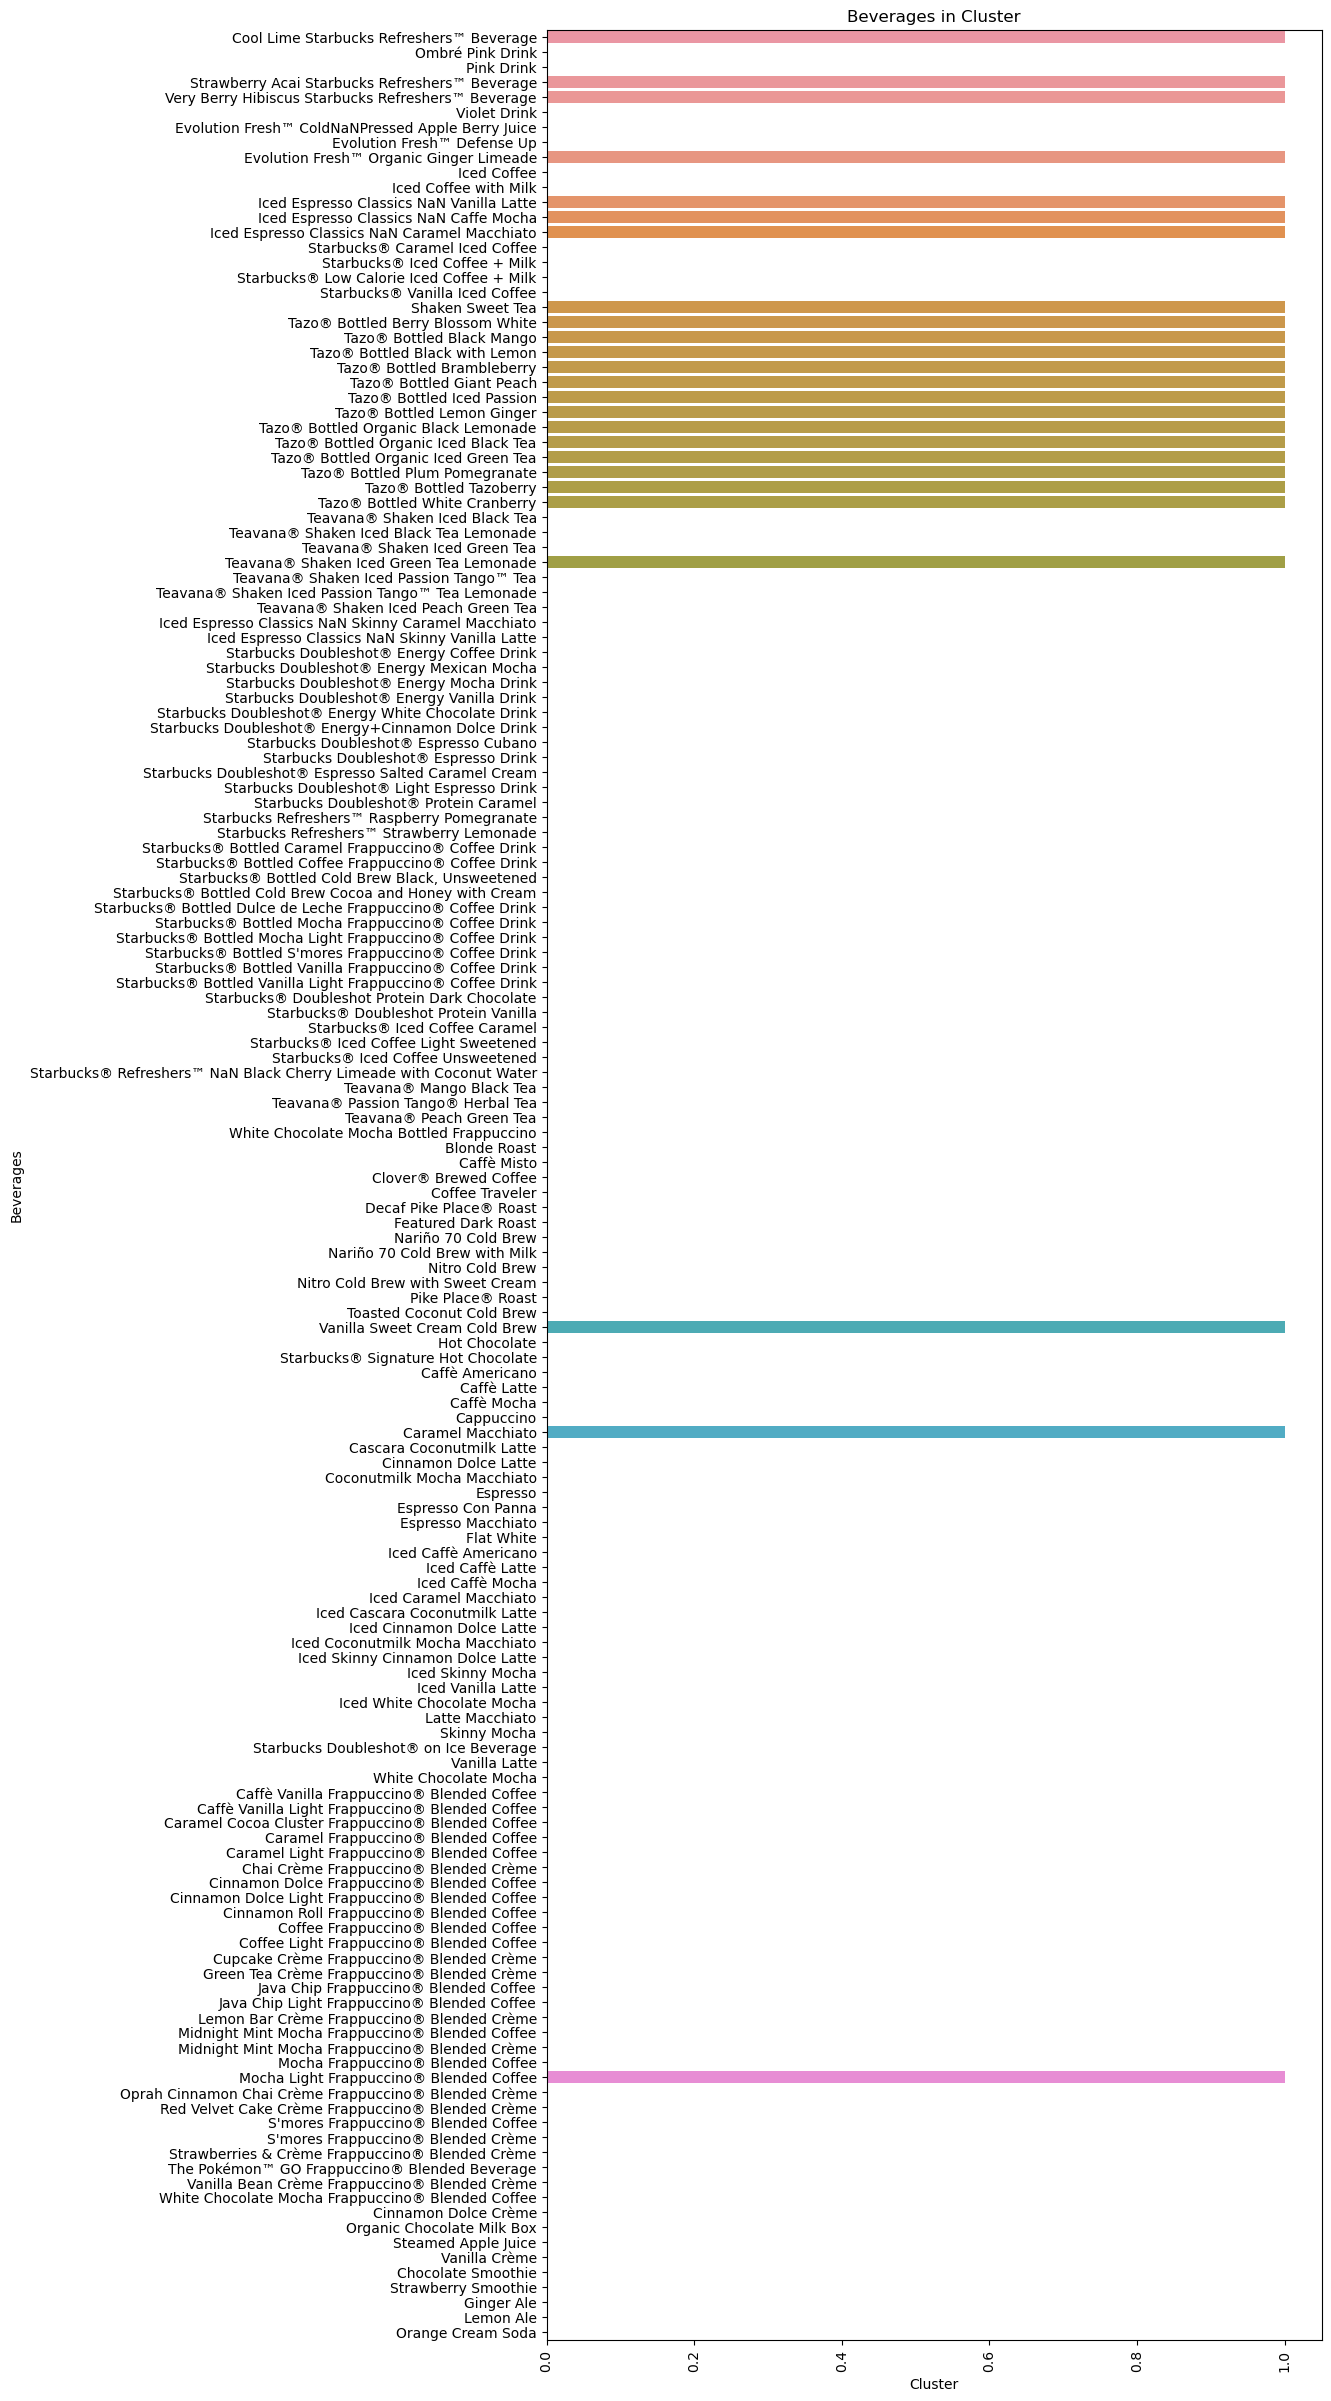

In [185]:
#Plot Histogram of Custer by Beverages
plt.figure(figsize=(10,30))
plot = sns.barplot(y=new_star['Beverages'], x=new_star['Cluster']).set(xlabel='Cluster', ylabel='Beverages', title='Beverages in Cluster')
plt.xticks(rotation=90)
print(plot)

Majority of the beverages were categorised on the first cluster from the figure above.

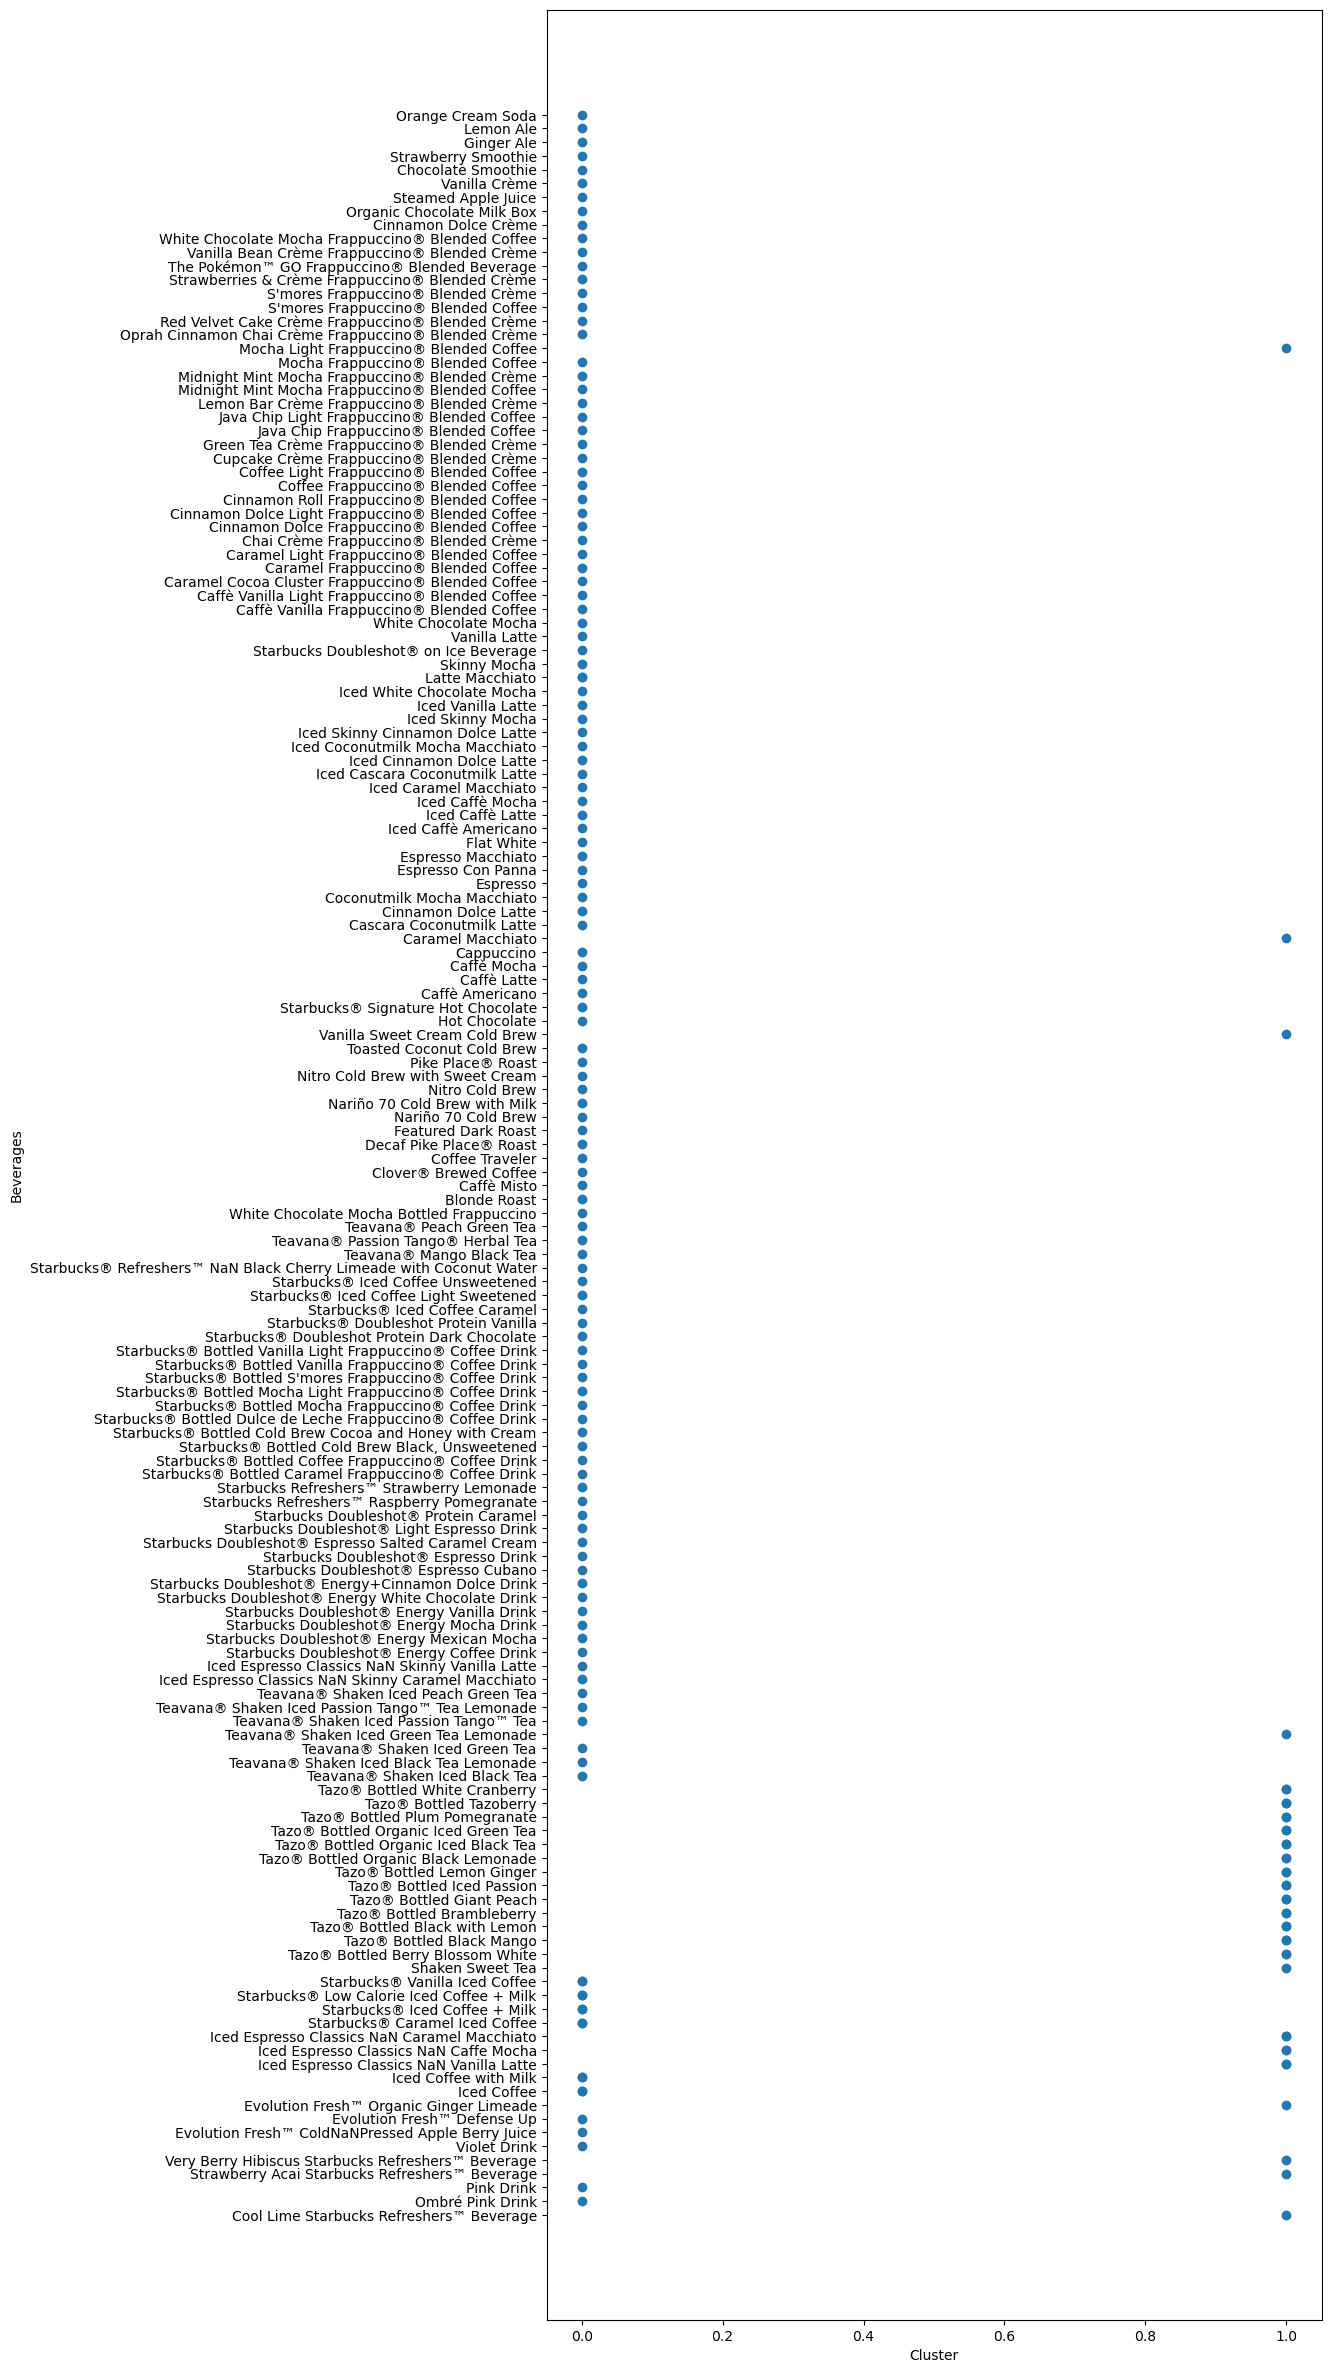

In [253]:
plt.figure(figsize=(10,30))
plt.scatter(new_star['Cluster'], new_star['Beverages'])
plt.xlabel('Cluster')
plt.ylabel('Beverages')
plt.show()

# Final Remark

There are 177 rows and 7 columns in total.From the original dataset, a few rows are not significant (NA) and will not add any insight to the analysis, so they will be dropped to enable us to have a clean dataset. The distribution of the dataset shows that there are some outliers in the dataset.

Based on the plot above, the beverages with the highest frequency of use are all round numbers. Starbucks® Signature Hot Chocolate, which has 110 grammes and 430 calories, is not recommended for people who are on a calorie deficit programme (intermittent fasting), as a cup of this drink contains more than half of the required calories for one day during the fasting program.

Based on the plot above, the beverages with the highest frequency of using fat (g) are all round numbers. Starbucks® Signature Hot Chocolate has the most calories, with 110 calories and 26 grammes of fat per serving.

Based on the plot above, the beverages with the highest frequency of carbohydrate use are all round numbers. The most caloric beverage is "Cinnamon Dolce Frappuccino® Blended Coffee," which has 146 calories and 64 carbs.

Based on the plot above, the beverages with the highest frequency used (g) are all round numbers. The most popular fiber-rich beverage is "Chocolate Smoothie," which has 172 calories and 8 fibers.

Based on the plot above, the beverages with the highest frequency of protein use are all round numbers. The most common protein-containing beverage is "Starbucks® Doubleshot Protein Vanilla," which contains 69 grammes and 20 fibers.

Based on the plot above, the beverages with the highest frequency of sodium use are all round numbers. The most popular protein-rich beverage is "White Chocolate Mocha," which has 139 calories and 240 mg of sodium.

Looking at the distribution of the dataset, it is obvious that there is an outlier in the data. The data is not normally distributed. The majority of the beverages have the most calories. This data is then split into percentages for each 
cluster in the table above. There is a large amount of calories in the top 10% of beverages; it appears that those that do exist are actually within Cluster 1, which has been noted as having the highest calories. Whereas, in general, Pink Drink is one of the beverages with no calories. These details are seen in the k-means table above. Variables with skewness greater than one are highly positively skewed.This demonstrates that all variables are highly positively skewed.

Based on data transformation, it is clear that log, root, and reciprocal transformations have reduced the number of outliers to zero. Originally, only two outliers were available, and it has now been reduced to This shows that log, root, and reciprocal transformations are useful for the statistical analysis later on.
The table above shows a strong and positive relationship between variables. Furthermore, the log variables (log of calories has a strong positive relationship with other log variables, log of fibre only has a strong positive relationship with log of fiber, and so on) have a strong positive relationship.There is a strong and positive correlation between the log of calories and other variables. The elbow point is 2.

# Conclusion

In conclusion, there are different results from the analysis because of the variety of analysis methods. Some of the outcomes contradict one another. This might be because of outliers and poor data quality; some of the data contain incorrect values (e.g., NA and 0 values). Explanatory data analysis shows that calories, among other features of the beverages in the Starbucks dataset, are very high and present in the beverages. The K-Means algorithm revealed observable clusters and distinct calorie ranges when applied to the top 10% of calories in the dataset. From what the explanatory data analysis says, it seems that it is not unusual for beverages or drinks to have calories. There is evidence that not all beverages share the same characteristics, despite the fact that there is a strong and positive relationship among the variables. The analysis shows Tazo® Bottled Black Mango is the beverage with the highest calorie count.

# Question 2 - Model Building

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix

In [119]:
starbucks.isna().sum()

Beverages    0
Calories     0
Fat(g)       0
Carb(g)      0
Fiber(g)     0
Protein      0
Sodium       0
dtype: int64

In [120]:
starbucks['Tea'] = starbucks['Beverages'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data_star = starbucks.drop('Beverages', axis=1)

In [121]:
data_star.head()

Calories  Fat(g)  Carb(g)  Fiber(g)  Protein  Sodium  Tea
0      45.0     0.0     11.0       0.0      0.0    10.0    0
1       0.0     0.0      0.0       0.0      0.0     0.0    0
2       0.0     0.0      0.0       0.0      0.0     0.0    0
3      80.0     0.0     18.0       1.0      0.0    10.0    0
4      60.0     0.0     14.0       1.0      0.0    10.0    0

In [122]:
data_star.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 176
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Calories  155 non-null    float64
 1   Fat(g)    155 non-null    float64
 2   Carb(g)   155 non-null    float64
 3   Fiber(g)  155 non-null    float64
 4   Protein   155 non-null    float64
 5   Sodium    155 non-null    float64
 6   Tea       155 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 9.7 KB


In [123]:
print("Class Distribution:")
print(data_star['Tea'].value_counts() / data_star.shape[0])

Class Distribution:
0    1.0
Name: Tea, dtype: float64


In [124]:
{column: len(data_star[column].unique()) for column in ['Tea']}

{'Tea': 1}

In [125]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [126]:
data_star = onehot_encode(
    data_star,
    columns=['Tea'],
    prefixes=['tea']
)

In [127]:
data_star.isna().sum()

Calories    0
Fat(g)      0
Carb(g)     0
Fiber(g)    0
Protein     0
Sodium      0
tea_0       0
dtype: int64

# Predicting Calories, Fat(g), Carb(g), Fiber(g), Protein and gender
The problem with the dataframe is that there are missing values in gender and income columns. To address this, I will use random forest regressor and random forest classifier to predict these values.

In [219]:
#splitting df_new to 2 dataframes: one contains null values for income and gender, the other one doesn't
df_ml_test = modeldat[data_star['Calories'].isnull()].copy()
df_ml_train = data_star.dropna(axis = 0, subset = ['Calories']).copy()

In [195]:
df_ml_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Calories  0 non-null      float64
 1   Fat(g)    0 non-null      float64
 2   Carb(g)   0 non-null      float64
 3   Fiber(g)  0 non-null      float64
 4   Protein   0 non-null      float64
 5   Sodium    0 non-null      float64
 6   tea_0     0 non-null      uint8  
dtypes: float64(6), uint8(1)
memory usage: 0.0 bytes


In [205]:
def regress_result(actual,preds,model):
    '''
    This is a function for random forest model evaluation
    '''
    print("MSE for " + model + " is:", mean_squared_error(actual, preds))
    print("R2 score for " + model + " is:", r2_score(actual, preds))
    print("MAE for " + model + " is:", mean_absolute_error(actual, preds))
    print('\n')

In [206]:
def random_forest(X_train, X_test, y_train, y_test):
    '''
    INPUT: train and test dataframes obtained with train_test_split
    OUTPUT: random forest regressor model
    
    This function also prints the random forest regressor metrics
    '''
    #getting param grid for gridsearchcv
    param_grid = {
    'max_depth': [100,150,200],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1,3,5],
    'min_samples_split': [2,3,5],
    'n_estimators': [100,150,200]
    }
    # Create a based model
    rf = RandomForestRegressor()
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, verbose = 2)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    #copy best parameters to a model
    rf_mod = grid_search.best_estimator_
    #fit, predict, and evaluate the model
    rf_mod.fit(X_train, y_train)
    rf_pred = rf_mod.predict(X_test)
    regress_result(y_test, rf_pred, 'Random Forest')
    return rf_mod

In [207]:
X = df_ml_train.drop(['Fat(g)', 'Carb(g)', 'Fiber(g)', 'Protein', 'Sodium', 'tea_0'], axis = 1).copy()
y = df_ml_train['Calories'].copy()

First, I will try to apply default random forest regressor to the training and testing dataframes.

In [208]:
X.fillna(0, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [209]:
regress = RandomForestRegressor()
regress.fit(X_train, y_train)
y_pred = regress.predict(X_test)

In [213]:
regress_result(y_test, y_pred, 'Random Forest')

MSE for Random Forest is: 16.200403225806415
R2 score for Random Forest is: 0.9974010120612662
MAE for Random Forest is: 1.1209677419354818




The model is good, with the R2 score of 0.99. Then i will increase the R2 and decrease the MSE using the functions I created and grid search cv.

In [214]:
rf_calories = random_forest(X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=1

[CV] END max_depth=100, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=150, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=150, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=150, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=150, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=150, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=150, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=150, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=150, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=150, min_samples_leaf=1, min_samples_split=2, n_estimators=200;

[CV] END max_depth=150, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=200, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=200, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=200, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=200, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=200, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=200, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=200, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=200, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=200, min_samples_leaf=1, min_samples_split=2, n_estimators=200;

[CV] END max_depth=200, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.3s
{'max_depth': 150, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
MSE for Random Forest is: 16.71544802867381
R2 score for Random Forest is: 0.9973183847826793
MAE for Random Forest is: 1.1000000000000008




# Logistic Regression (LR)
The type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables is LR. In LR the dependent variable is always binary. It is mainly used to for prediction and also calculating the probability of success.

In [221]:
from statsmodels.tools import add_constant as add_constant
modeldat_constant = add_constant(modeldat)
modeldat_constant.head()

Calories  Fat(g)  Carb(g)  Fiber(g)  Protein  Sodium  tea_0
0      45.0     0.0     11.0       0.0      0.0    10.0      1
1       0.0     0.0      0.0       0.0      0.0     0.0      1
2       0.0     0.0      0.0       0.0      0.0     0.0      1
3      80.0     0.0     18.0       1.0      0.0    10.0      1
4      60.0     0.0     14.0       1.0      0.0    10.0      1

In [255]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols = modeldat_constant.columns[:-1]
model = sm.Logit(modeldat.tea_0, modeldat_constant[cols])
#result = model.fit()
#result.summary()